In [1]:
import pandas 
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import rc

rc('font', family='Source Sans Pro') 
plt.style.use( 'bmh' ) 

# BglB kinetic data and thermal stability data statistical analysis 

## Kinetics 

In [3]:
# see notebook in raw/ for data preprocessing 
df = pandas.read_csv( 'clean/kinetics.csv' ) 
#df = pandas.read_csv( 'pub/kinetics.csv' ) 
df = df[ ( df.kobs > 0 ) ] 

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

20 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'protein_yield', 'dilution',
       'note', 'kobs', 's'],
      dtype='object')


In [4]:
p0=(3,1)
null = np.array( [ np.nan for i in range( len( p0 ) ) ] )
null

array([ nan,  nan])

In [5]:
def my_curve_fit( f, xdata, ydata, p0 ):
    null_return = ( [ np.nan, np.nan ], [ np.nan, np.nan ] )
    try:
        curve_return = curve_fit( f, xdata, ydata, p0 )
        if len( curve_return ) == 2:
            errors = np.sqrt( np.diag( curve_return[1] ) ) 
            return curve_return[0], errors 
        else:
            return null_return
    except:
        return null_return

In [6]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

In [7]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) != 24:
        print( idx, 'ain\'t got no ({} data points)'.format( len( data ) ) )

E164G ain't got no (17 data points)
E164R ain't got no (14 data points)
F415N ain't got no (21 data points)
H178R ain't got no (16 data points)
H379T ain't got no (22 data points)
L362M ain't got no (21 data points)
N220G ain't got no (21 data points)
N220R ain't got no (21 data points)
N220Y ain't got no (21 data points)
N293C ain't got no (21 data points)
N293D ain't got no (16 data points)
N404C ain't got no (22 data points)
R240E ain't got no (11 data points)
S16N ain't got no (17 data points)
T15A ain't got no (21 data points)
W325G ain't got no (15 data points)
W325R ain't got no (23 data points)
W399R ain't got no (20 data points)
W409Y ain't got no (23 data points)
WT ain't got no (21 data points)


In [8]:
my_mutants = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    params, std_err = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    my_mutants.loc[ idx ] = np.append( params, std_err )
    
# rename my_mutants to mm_fits!!!!!!!!!!!

In [9]:
good_fits = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] )
for idx, data in my_mutants.iterrows():
    if data.kcat > data.kcat_std_err and data.km > data.km_std_err:
        good_fits.loc[ idx ] = data 
    else:
        good_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
good_fits

kcat        km  kcat_std_err  km_std_err
E164G         NaN       NaN           NaN         NaN
E164R    2.012481  0.229723      1.474264    0.218130
F415N    0.893262  0.023069      0.028304    0.001944
H178R    4.281337  0.339193      3.303985    0.315174
H379T    5.169199  0.005773      0.122313    0.000511
L362M  918.087343  0.005201      9.788307    0.000212
N220G  210.359993  0.033505      6.201594    0.002337
N220R   14.914215  0.012419      0.528695    0.001389
N220Y  628.540551  0.000359      4.773314    0.000015
N293C   11.067364  0.019674      0.412238    0.002042
N293D         NaN       NaN           NaN         NaN
N404C   85.426232  0.014310      3.736344    0.001904
R240E    2.755472  0.047034      0.965202    0.034821
S16N     1.246480  0.081821      0.477538    0.054531
T15A   614.809247  0.005250     14.702099    0.000478
W325G    0.948476  0.019197      0.116973    0.006645
W325R         NaN       NaN           NaN         NaN
W399R    0.200114  0.003289      0.012749    0.000869
W409Y  810.751634  0.002553     13.267589    0.000180
WT     919.667384  0.005218      7.056461    0.000153

In [10]:
# try linear fits as well! 

lin_fits = pandas.DataFrame( columns=[ 'lin_slope', 'lin_intercept', 'rvalue', 'pvalue', 'lin_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    lin_fit = linregress( data.s, data.kobs ) 
    lin_fits.loc[ idx ] = lin_fit
    
lin_fits

lin_slope  lin_intercept    rvalue        pvalue  lin_std_err
E164G      4.632243       0.070933  0.854367  1.264466e-05     0.727495
E164R      5.933777       0.046447  0.994000  6.651903e-13     0.188497
F415N      8.799014       0.068810  0.953245  2.518561e-11     0.639949
H178R      9.707350       0.044091  0.994686  3.164775e-15     0.268539
H379T     58.371236       0.886624  0.806125  5.918249e-06     9.581127
L362M  10582.450544     173.376352  0.832728  2.815468e-06  1614.234245
N220G   1928.091237       8.709798  0.960460  5.271270e-12   128.224128
N220R    164.234071       1.628680  0.894660  4.480779e-08    18.814422
N220Y   5104.036991     315.326278  0.558482  8.504364e-03  1739.215240
N293C    114.183613       0.857690  0.934192  6.009417e-10    10.004137
N293D     24.719896       0.055635  0.996552  1.541014e-16     0.550095
N404C    936.611795       8.633934  0.929241  4.231498e-10    83.272413
R240E     19.885022       0.238157  0.883221  3.135519e-04     3.519396
S16N       6.865087       0.082972  0.975437  2.889065e-11     0.400289
T15A    7092.101600     117.984849  0.840750  1.824634e-06  1047.777738
W325G      8.595590       0.154928  0.943165  1.376661e-07     0.840001
W325R     20.790431       0.091654  0.961790  2.733482e-13     1.291473
W399R      2.161353       0.054813  0.775024  5.991466e-05     0.415379
W409Y   9261.407013     193.806561  0.749105  3.904629e-05  1787.220209
WT     10601.568203     169.853150  0.824687  4.254051e-06  1668.034694

In [11]:
any( np.array( [ np.nan, np.nan, np.nan, ] ) )

True

All the plotting logic goes here, to produce publication-quality plots is a lot of code

In [12]:
def lin_f( x, m, b ):
    return m*x+b

E164G 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 4.63224256  0.07093335]


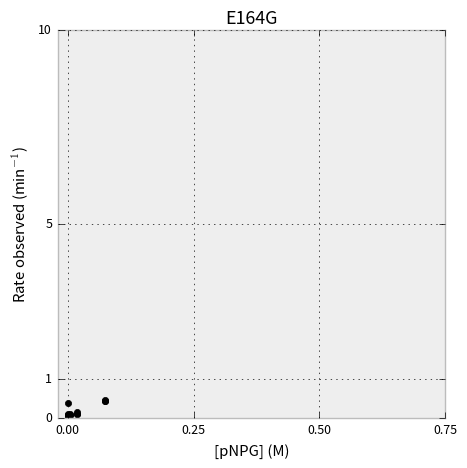

E164R 
 MM params (kcat, km): [ 2.01248125  0.22972304] 
 linear params (slope, int): [ 5.93377671  0.04644738]


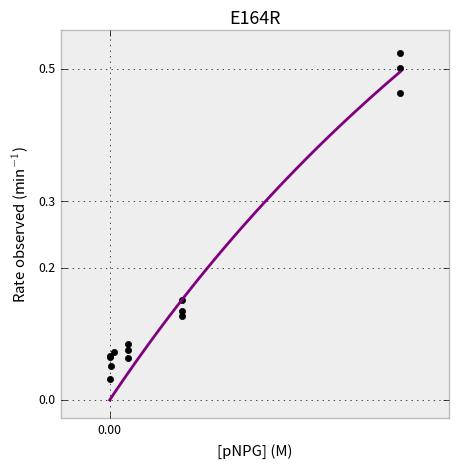

F415N 
 MM params (kcat, km): [ 0.89326191  0.02306939] 
 linear params (slope, int): [ 8.79901415  0.06880959]


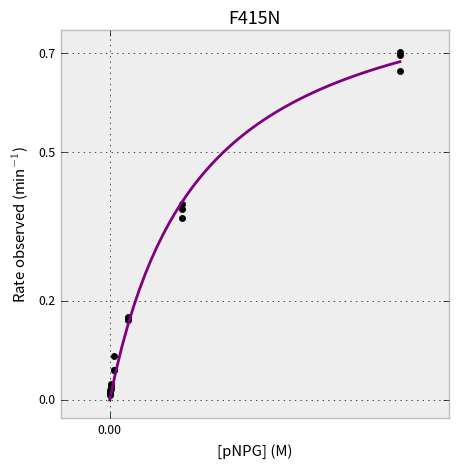

H178R 
 MM params (kcat, km): [ 4.28133736  0.33919261] 
 linear params (slope, int): [ 9.70734974  0.04409122]


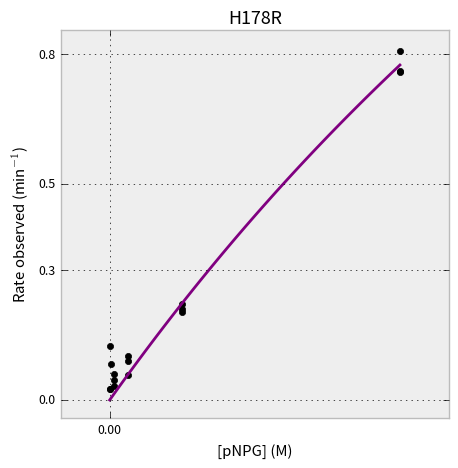

H379T 
 MM params (kcat, km): [ 5.16919903  0.00577346] 
 linear params (slope, int): [ 58.37123633   0.88662414]


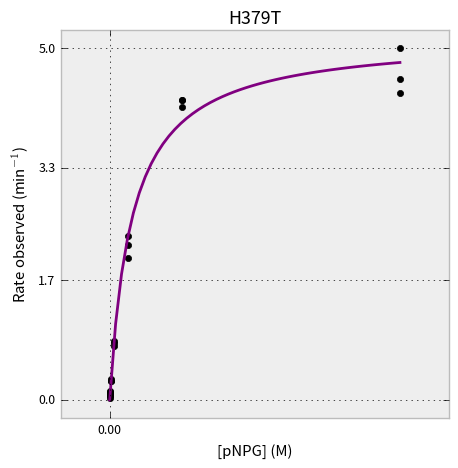

L362M 
 MM params (kcat, km): [  9.18087343e+02   5.20084339e-03] 
 linear params (slope, int): [ 10582.45054403    173.37635194]


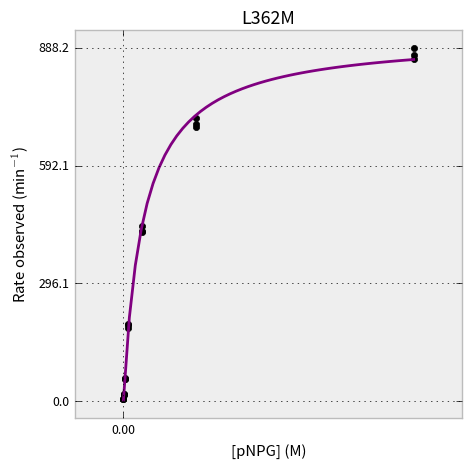

N220G 
 MM params (kcat, km): [  2.10359993e+02   3.35046900e-02] 
 linear params (slope, int): [ 1928.09123694     8.70979841]


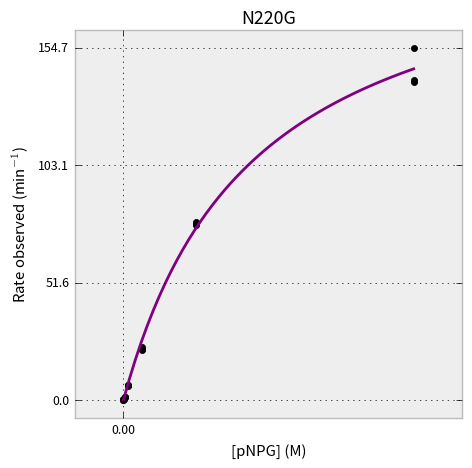

N220R 
 MM params (kcat, km): [  1.49142150e+01   1.24194785e-02] 
 linear params (slope, int): [ 164.2340711     1.62868022]


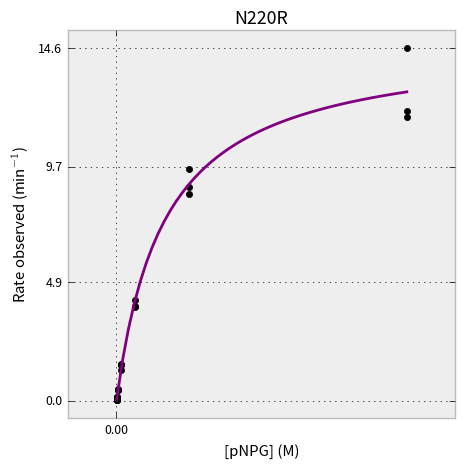

N220Y 
 MM params (kcat, km): [  6.28540551e+02   3.59310132e-04] 
 linear params (slope, int): [ 5104.0369906    315.32627803]


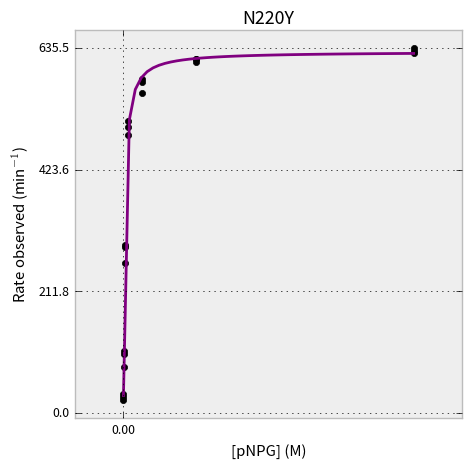

N293C 
 MM params (kcat, km): [ 11.06736362   0.01967436] 
 linear params (slope, int): [ 114.18361308    0.85768976]


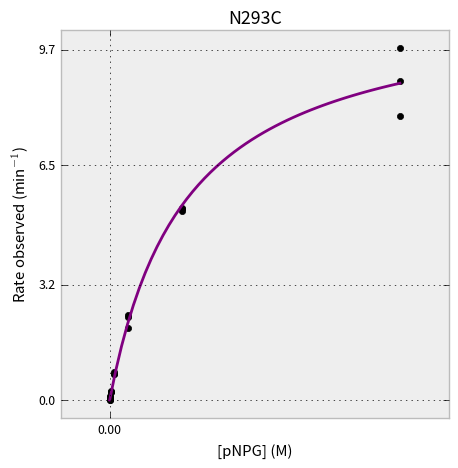

N293D 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 24.71989586   0.05563532]


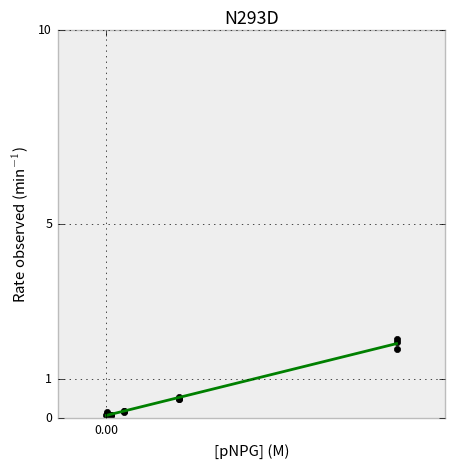

N404C 
 MM params (kcat, km): [  8.54262316e+01   1.43103644e-02] 
 linear params (slope, int): [ 936.61179489    8.63393393]


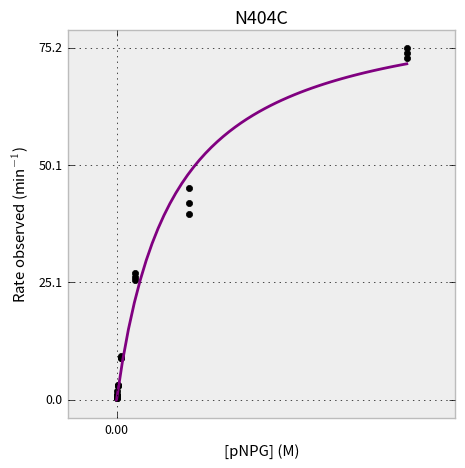

R240E 
 MM params (kcat, km): [ 2.7554719   0.04703399] 
 linear params (slope, int): [ 19.88502214   0.2381568 ]


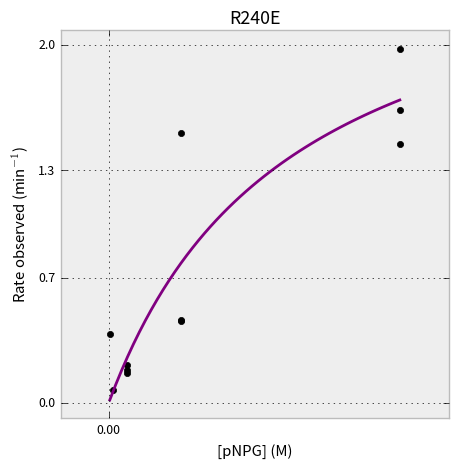

S16N 
 MM params (kcat, km): [ 1.24648028  0.08182074] 
 linear params (slope, int): [ 6.86508671  0.08297221]


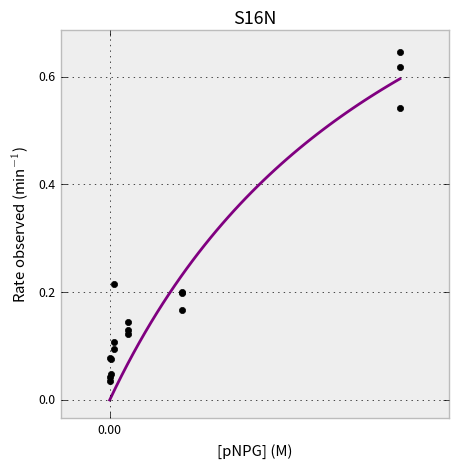

T15A 
 MM params (kcat, km): [  6.14809247e+02   5.24978722e-03] 
 linear params (slope, int): [ 7092.10159966   117.98484897]


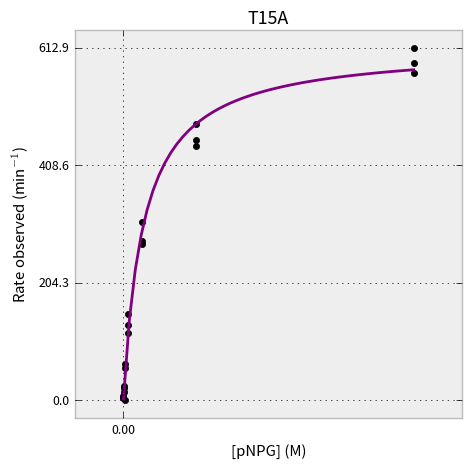

W325G 
 MM params (kcat, km): [ 0.9484757   0.01919729] 
 linear params (slope, int): [ 8.59558966  0.15492771]


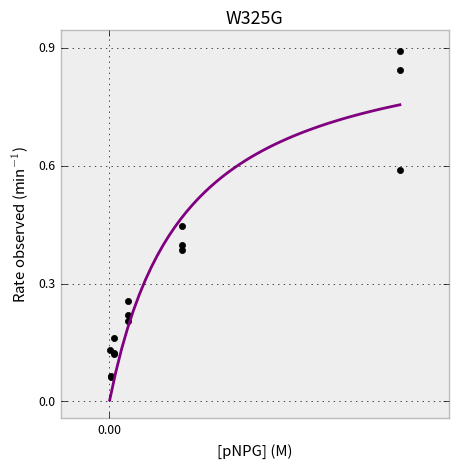

W325R 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 20.79043139   0.09165352]


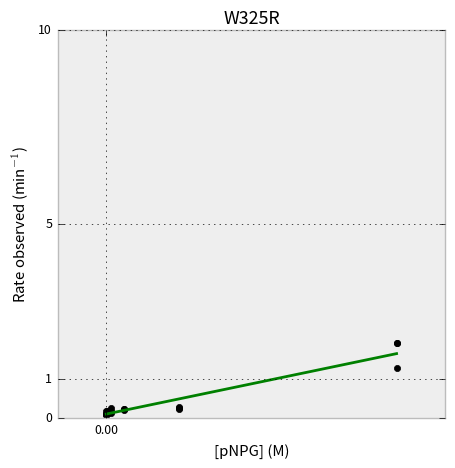

W399R 
 MM params (kcat, km): [ 0.20011444  0.00328934] 
 linear params (slope, int): [ 2.16135273  0.05481296]


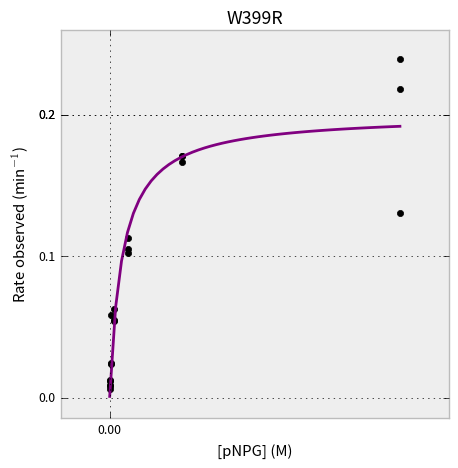

W409Y 
 MM params (kcat, km): [  8.10751634e+02   2.55297253e-03] 
 linear params (slope, int): [ 9261.40701302   193.80656077]


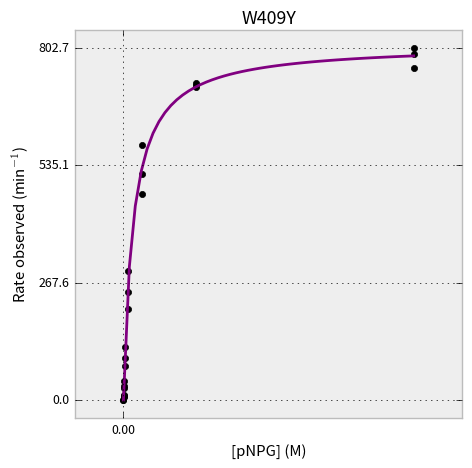

WT 
 MM params (kcat, km): [  9.19667384e+02   5.21800183e-03] 
 linear params (slope, int): [ 10601.56820288    169.85314971]


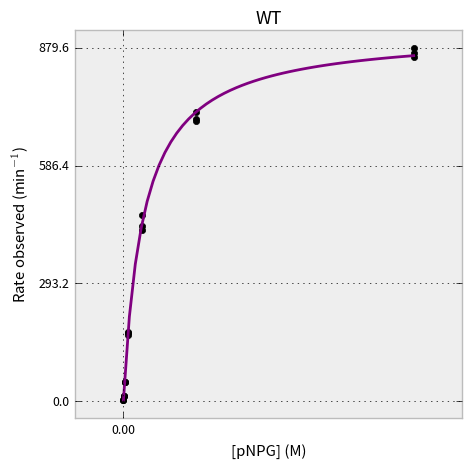

In [13]:
for i, (idx, data) in enumerate( df.groupby( 'mutant' ) ):
    
    x_vals = np.linspace( data.s.min(), data.s.max(), 50 )
    my_params = good_fits.loc[ idx ][ 0 : 2 ] # could be [ [ 'kcat', 'km' ] ] 
    my_lin = lin_fits.loc[ idx ][ [ 'lin_slope', 'lin_intercept' ] ]
    print( idx, '\n MM params (kcat, km):', my_params.values, '\n linear params (slope, int):', my_lin.values ) 

    plt.figure( figsize=( 5, 5 ) ) 
    plt.title( idx )         
    plt.xlabel( '[pNPG] (M)' ) 
    plt.ylabel( 'Rate observed (min$^{-1}$)' ) 
    plt.scatter( data.s, data.kobs, color='k' )
    plt.xticks( ( 0, .25, .5, .75 ) ) 
    plt.yticks( np.linspace( 0, data.kobs.max(), 4 ).round(1) )
    
    if 0 == len( list( filter( np.isnan, my_params ) ) ): 
        plt.plot( x_vals, v( x_vals, *my_params ), color='purple' ) 
    else:
        if my_lin[ 'lin_slope' ] > 10:
            plt.plot( x_vals, lin_f( x_vals, *my_lin), color='green' )
        plt.ylim( 0, 10 ) 
        plt.yticks( ( 0, 1, 5, 10 ) ) 
        
    plt.show()

# Thermal stability 

In [14]:
df = pandas.read_csv( 'clean/thermal.csv' ) 
df = df[ ( df.rate > 0 ) ]

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

132 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'temp'], dtype='object')


In [15]:
def r( x, x0, k ): 
    return 1 / ( 1 + np.exp( -k * ( x - x0 ) ) )

In [16]:
my_thermal = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    norm_rates = data[ 'rate' ] / data[ 'rate' ].max()
    params, cov = my_curve_fit( r, data.temp, norm_rates, ( 40, -1 ) )
    my_thermal.loc[ idx ] = np.append( params, cov ) 
    #print( np.append( params, cov ) ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [17]:
good_thermal_fits = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] )
for idx, data in my_thermal.iterrows():
    if 30 < data.tm < 50 and data.k < 0:
        good_thermal_fits.loc[ idx ] = data 
    else:
        good_thermal_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
pandas.options.display.max_rows = 1000 
good_thermal_fits

tm         k  tm_std_err  k_std_err
A195S    39.082872 -0.906737    0.341891   0.273713
BglB     39.859552 -1.145110    0.109541   0.088947
C167A    39.735604 -1.388449    0.552891   0.592386
C167Q    38.471592 -0.529363    0.192137   0.047938
D403A          NaN       NaN         NaN        NaN
E154D    38.699119 -0.688705    0.378855   0.167384
E164A    45.994408 -0.374600    0.132617   0.017976
E164G          NaN       NaN         NaN        NaN
E164R          NaN       NaN         NaN        NaN
E177A    37.307655 -0.486928    0.268726   0.056406
E180K    36.649703 -0.666760    0.278218   0.107651
E180L    39.223979 -0.520416    0.507574   0.121244
E222A    36.743814 -0.656627    0.142625   0.053160
E222H    34.708311 -0.636223    0.152795   0.053887
E222K    38.527005 -0.465003    0.547990   0.105830
E222Q    39.421741 -0.815595    0.424752   0.241688
E222R    39.086508 -0.748891    0.167044   0.088166
E222Y    37.041204 -0.593369    0.351085   0.115334
E353A    43.259012 -0.093199    5.066302   0.086526
E406A    39.934313 -1.524735    0.690877   0.747298
E406D    40.554600 -0.926165    0.157854   0.111766
E426S    39.459240 -1.449484    0.105873   0.153849
F415A    40.535557 -0.457738    0.269975   0.052938
F415N          NaN       NaN         NaN        NaN
F415N_D        NaN       NaN         NaN        NaN
F75H     38.606070 -0.415999    0.427047   0.065477
G355A          NaN       NaN         NaN        NaN
H101R    40.021711 -0.910853    0.123392   0.074920
H119A    40.158043 -1.028918    0.187119   0.133285
H119N    40.307737 -0.264553    0.613840   0.040125
H119N_D        NaN       NaN         NaN        NaN
H122E          NaN       NaN         NaN        NaN
H122N          NaN       NaN         NaN        NaN
H178A    33.841103 -0.627960    0.111474   0.038878
H178A_2  39.640673 -0.412580    0.398291   0.059952
H178R          NaN       NaN         NaN        NaN
H315E    33.207374 -0.164307    1.647490   0.049635
H315N          NaN       NaN         NaN        NaN
H373R    39.082872 -0.906737    0.341891   0.273713
H379R          NaN       NaN         NaN        NaN
H379T          NaN       NaN         NaN        NaN
I244E    37.793128 -0.872059    0.104993   0.067907
I244N    37.848487 -0.611758    0.144404   0.047519
I247N    36.750984 -0.326102    0.586474   0.061552
I303N    37.653451 -0.316974    0.636794   0.058776
I91E     39.199526 -0.443902    0.417155   0.072792
K344A    39.984589 -1.703772    0.068067   0.081587
L171A    38.288721 -0.480938    0.674935   0.138966
L174R    38.699119 -0.688705    0.378855   0.167384
L362M    39.848898 -0.613613    0.192764   0.062750
M221A    40.417340 -0.679593    0.351944   0.139723
M261D    36.771443 -0.064835    3.388007   0.032278
M323A    36.858352 -0.701668    0.123323   0.051476
M323K          NaN       NaN         NaN        NaN
M361T    39.489130 -1.436012    0.202778   0.281292
N163A    40.801928 -0.377448    0.340282   0.044450
N163C    37.698616 -0.338413    0.309999   0.032153
N163D    39.405197 -1.201320    0.126314   0.144261
N166D    36.997370 -0.342431    0.319543   0.034178
N220A    38.631135 -0.656263    0.247888   0.097386
N220R    39.422496 -0.679410    0.345731   0.139245
N220Y    41.630374 -0.365824    0.166883   0.020201
N223G    41.873609 -1.494785    0.219396   0.642504
N223H    39.458336 -0.740453    0.482916   0.233899
N293A    40.766924 -0.428815    0.238404   0.038736
N293C    38.667654 -0.536908    0.463248   0.123476
N293D          NaN       NaN         NaN        NaN
N293Q          NaN       NaN         NaN        NaN
N354A    40.557802 -0.335813    0.425864   0.044405
N404A    42.005790 -0.965891    0.106999   0.104534
N407C    42.577961 -1.299903    0.274215   0.272740
P329N          NaN       NaN         NaN        NaN
Q19A           NaN       NaN         NaN        NaN
Q19C           NaN       NaN         NaN        NaN
Q22S     36.470972 -0.502001    0.215952   0.048545
Q313R    42.112048 -1.211793    0.319835   0.428340
Q316R    40.

A195S


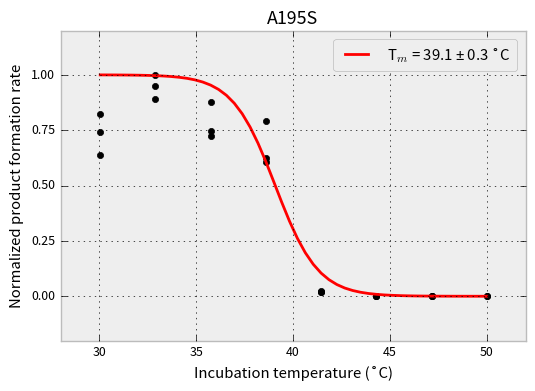

BglB


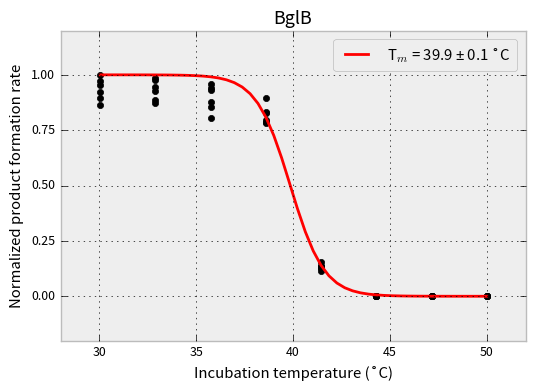

C167A


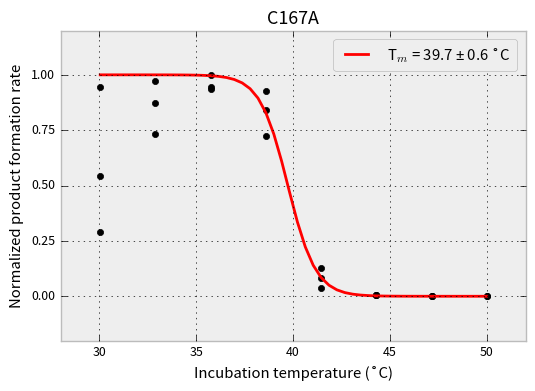

C167Q


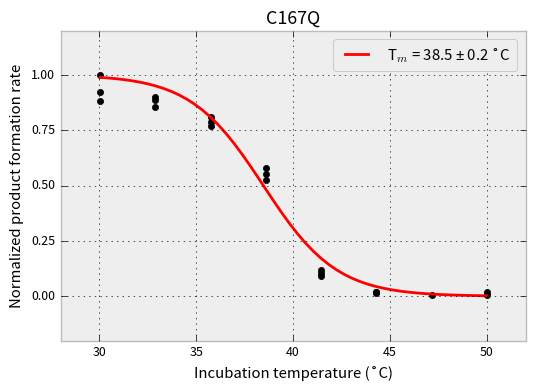

D403A


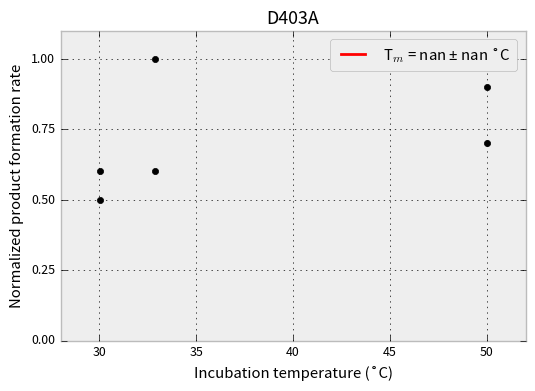

E154D


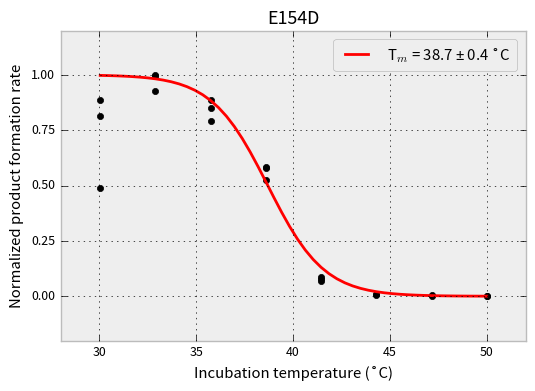

E164A


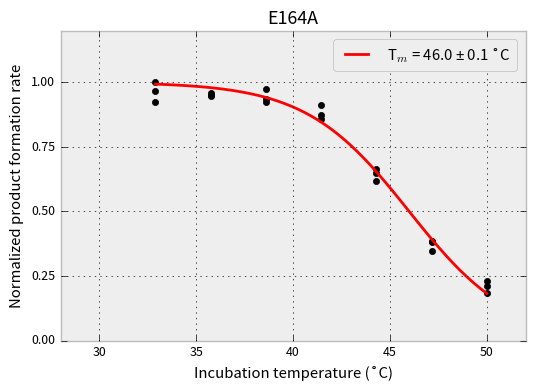

E164G


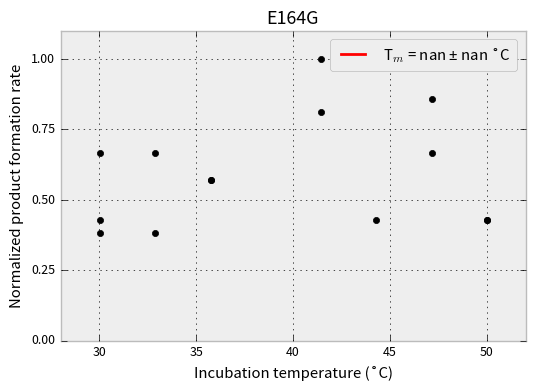

E164R


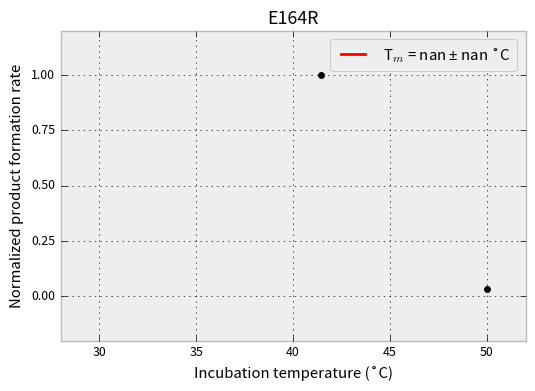

E177A


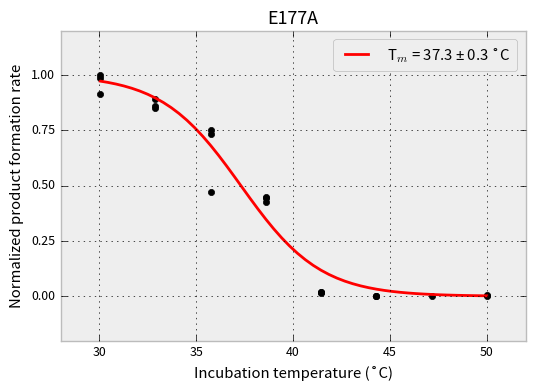

E180K


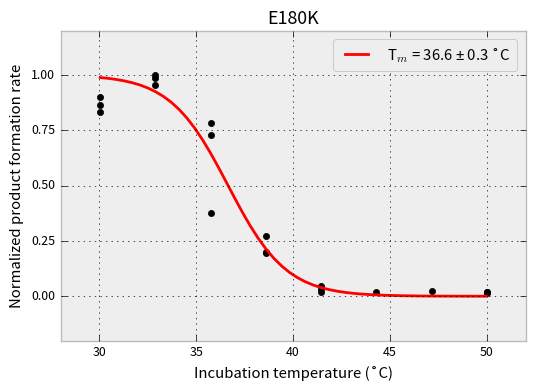

E180L


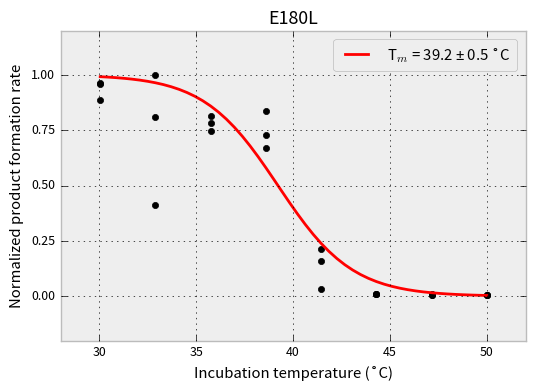

E222A


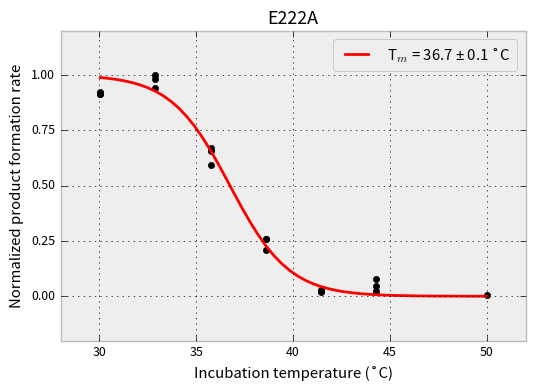

E222H


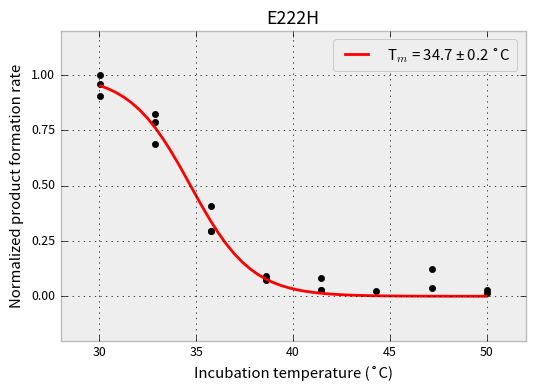

E222K


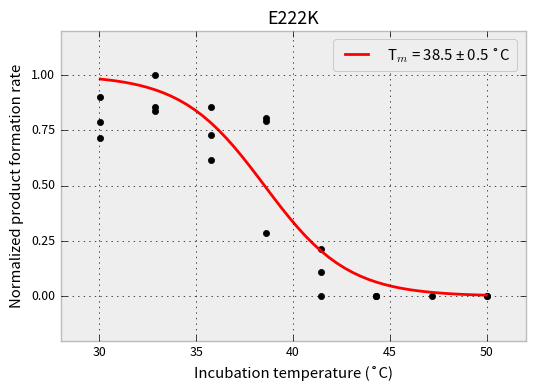

E222Q


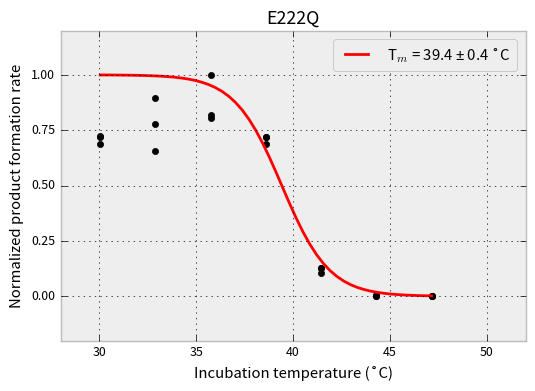

E222R


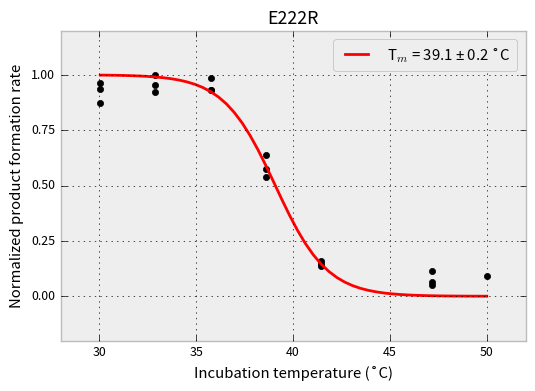

E222Y


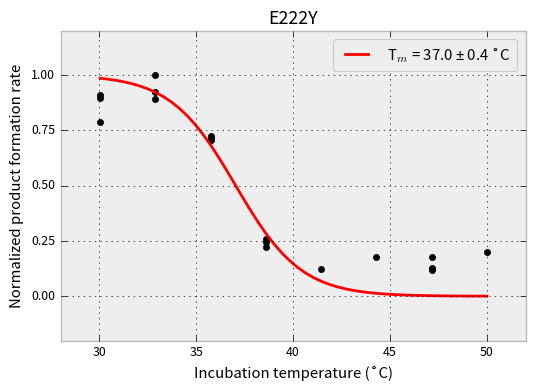

E353A


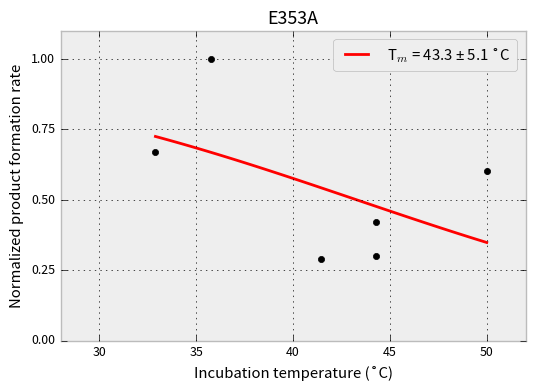

E406A


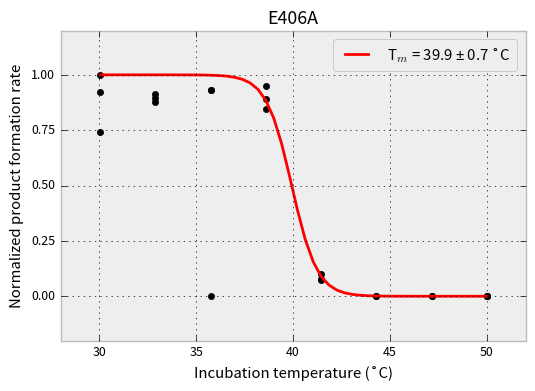

E406D


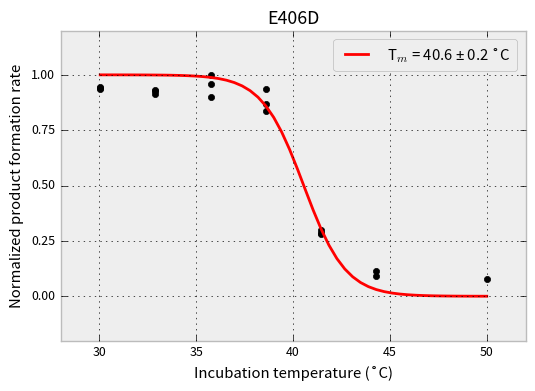

E426S


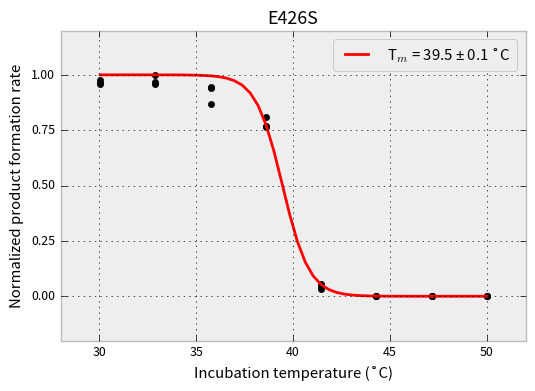

F415A


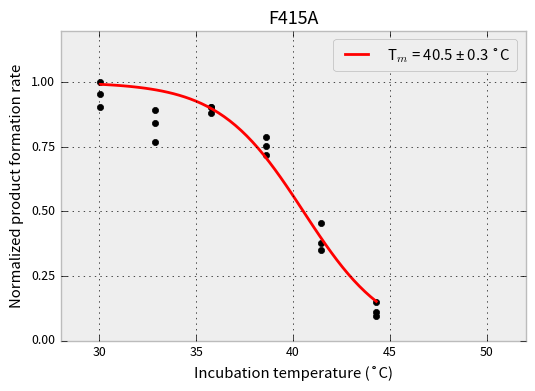

F415N


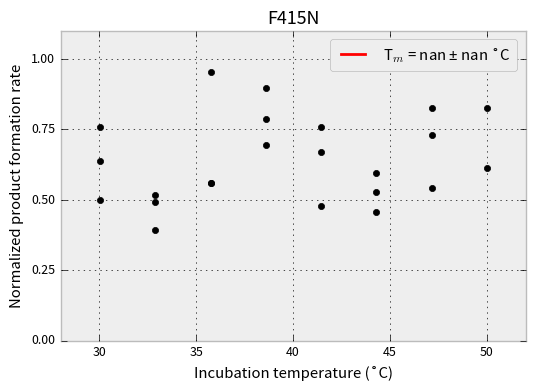

F415N_D


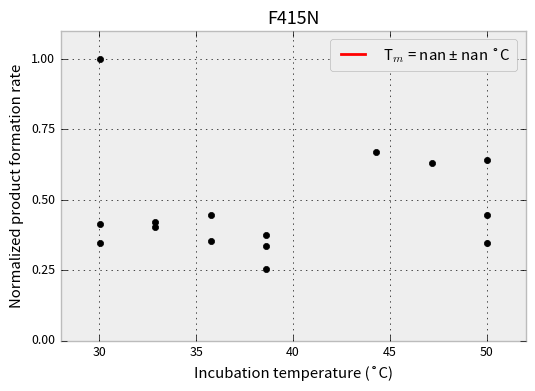

F75H


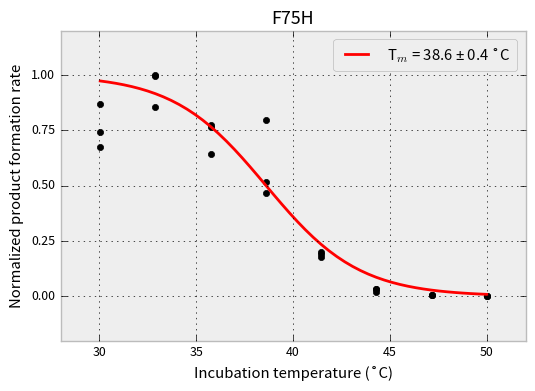

G355A


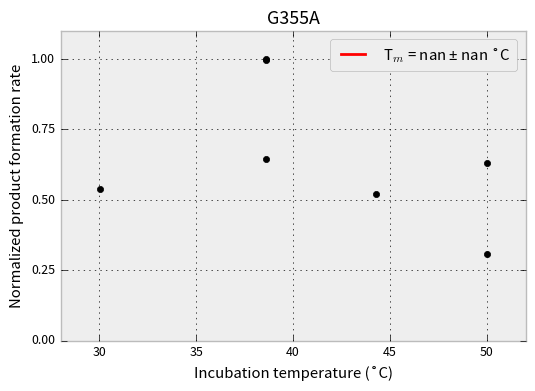

H101R


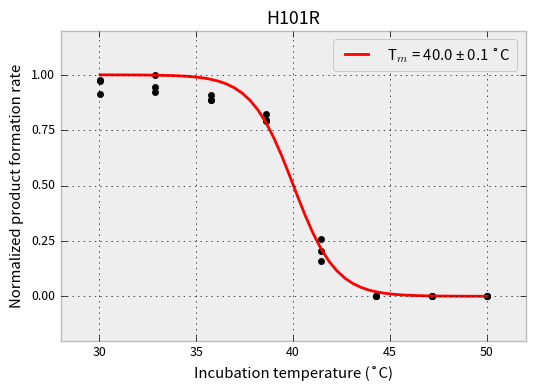

H119A


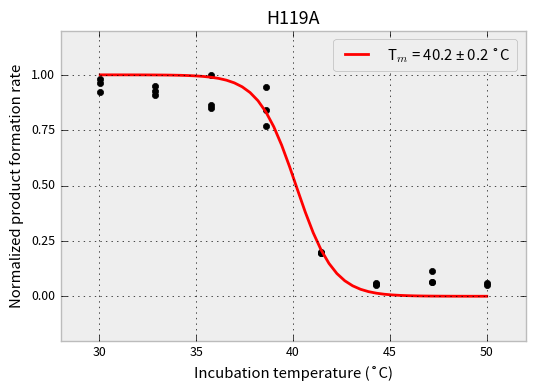

H119N


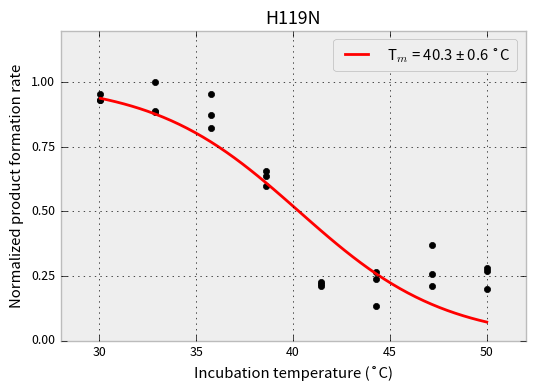

H119N_D


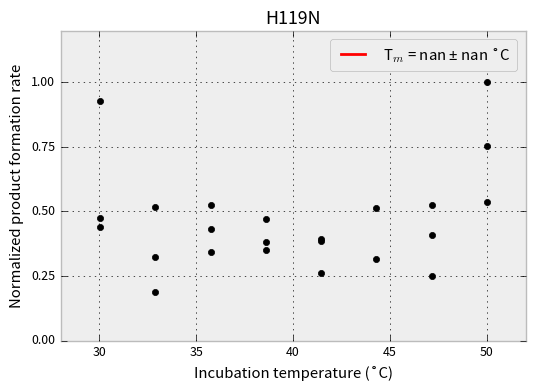

H122E


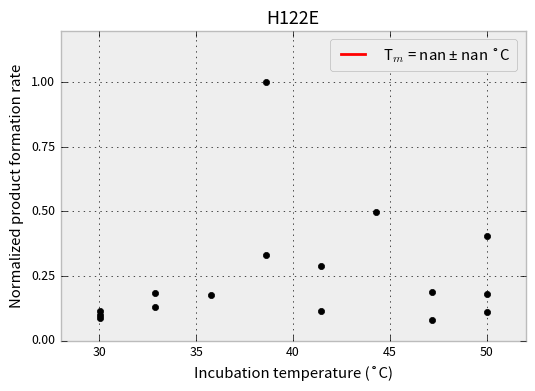

H122N


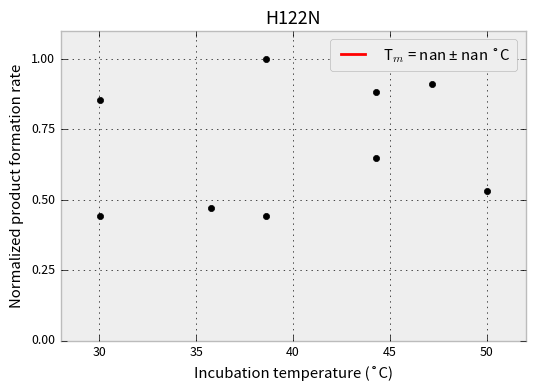

H178A


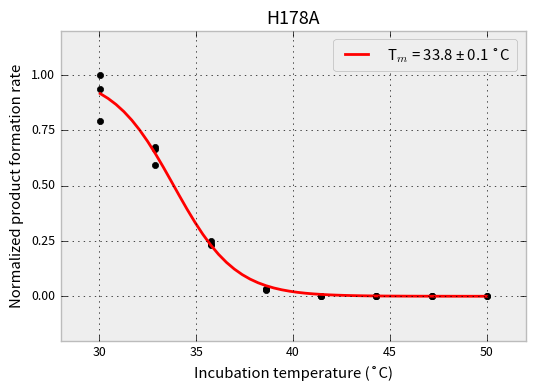

H178A_2


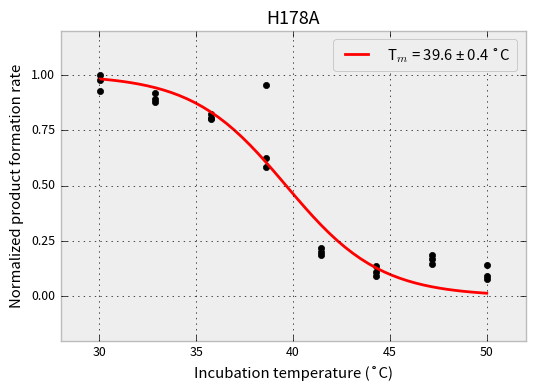

H178R


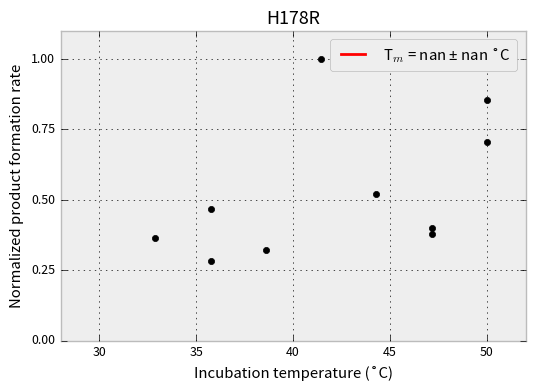

H315E


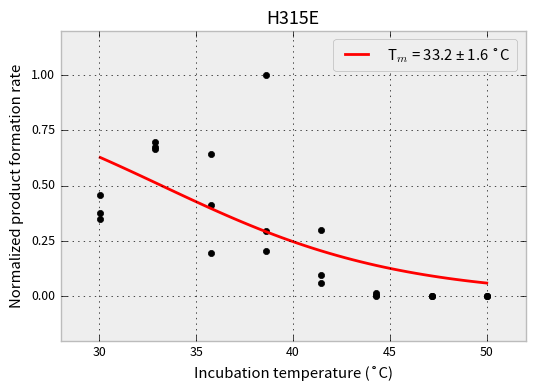

H315N


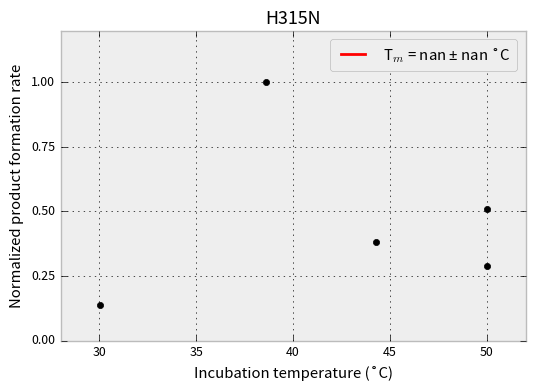

H373R


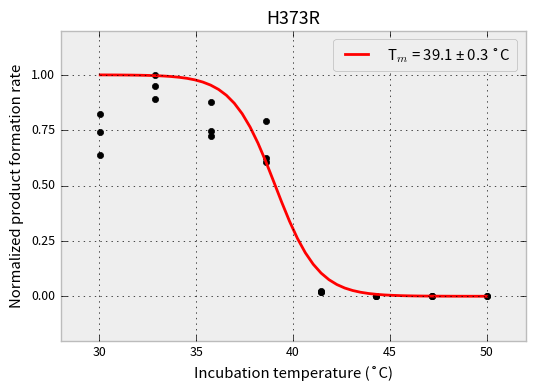

H379R


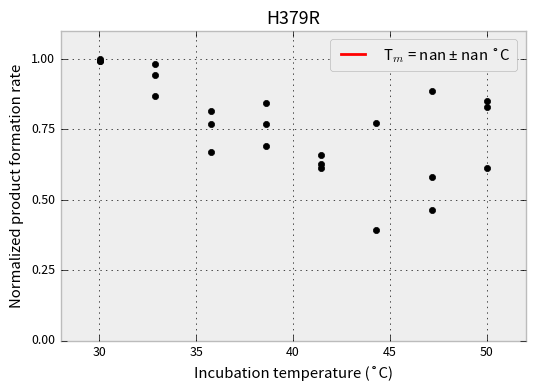

H379T


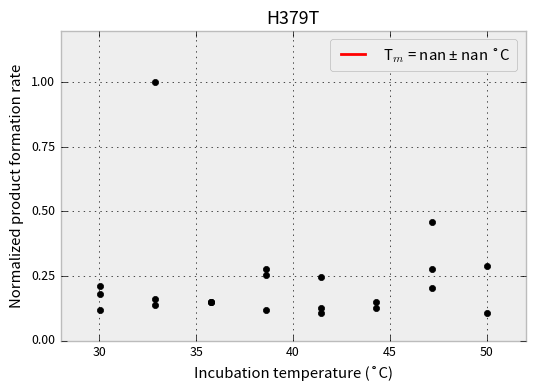

I244E


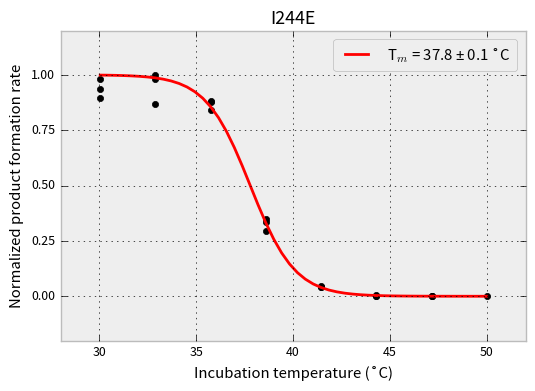

I244N


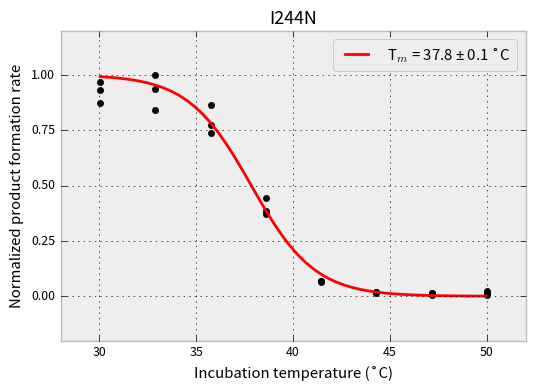

I247N


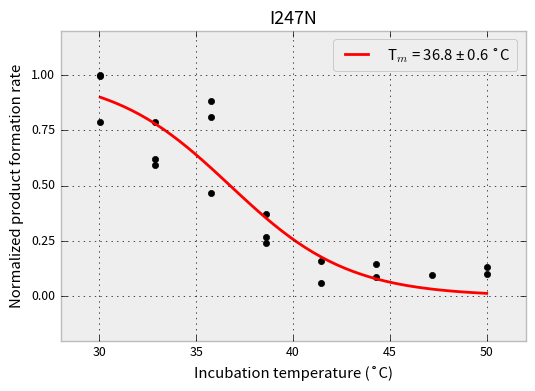

I303N


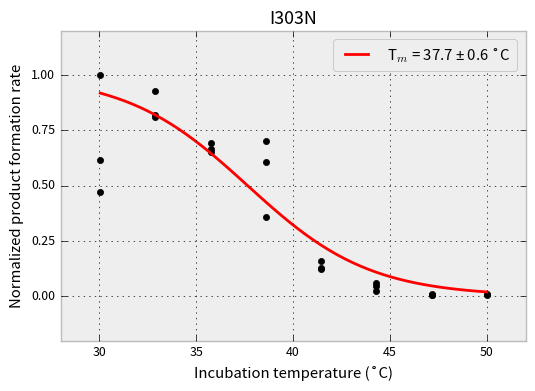

I91E


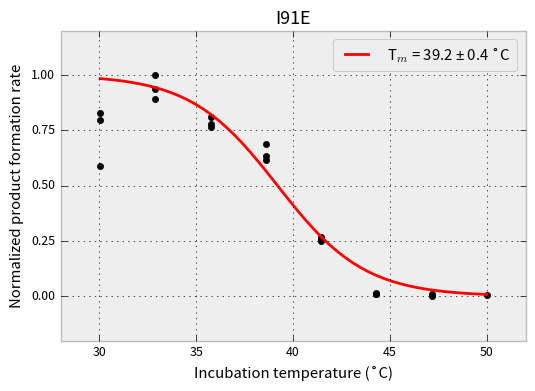

K344A


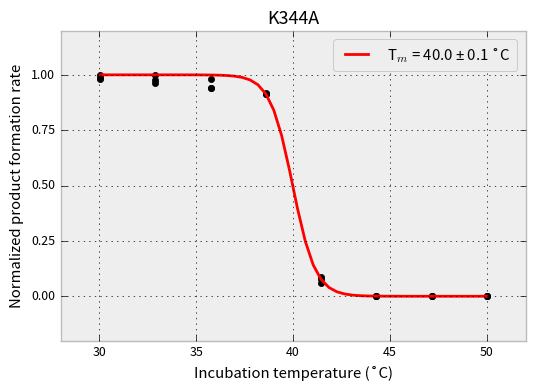

L171A


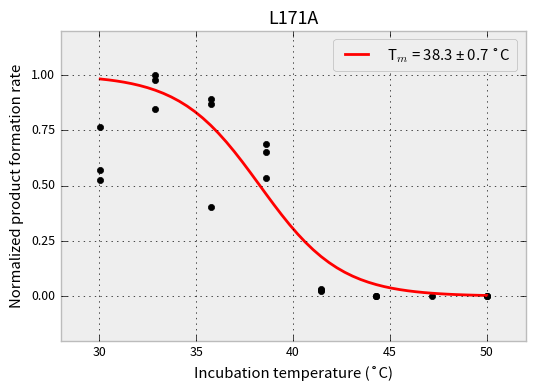

L174R


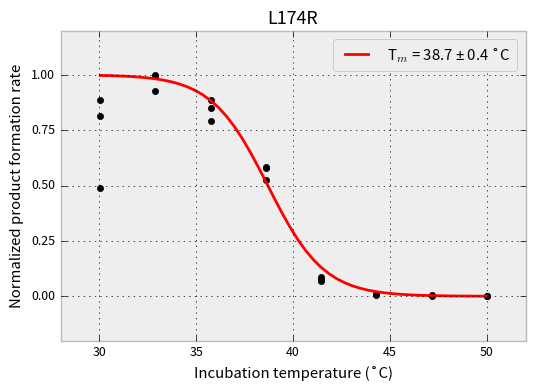

L362M


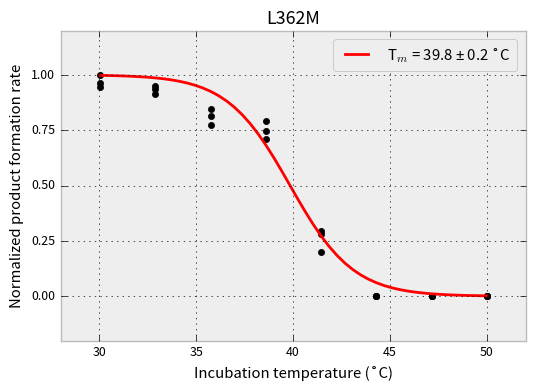

M221A


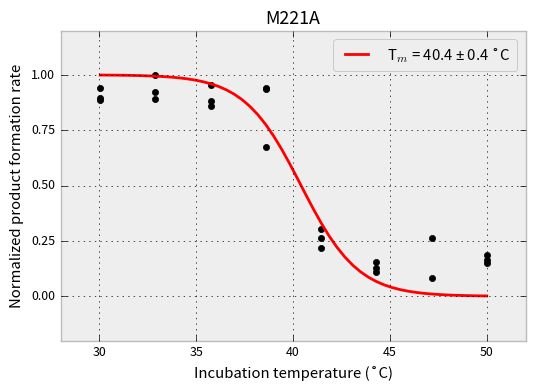

M261D


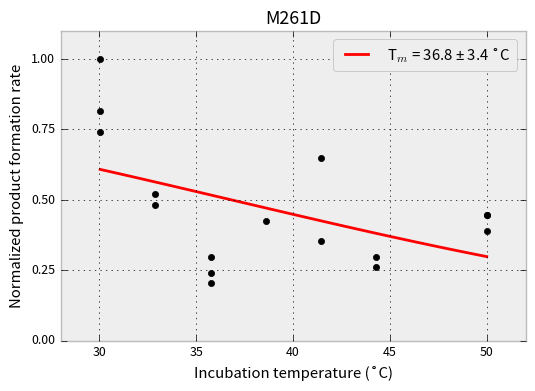

M323A


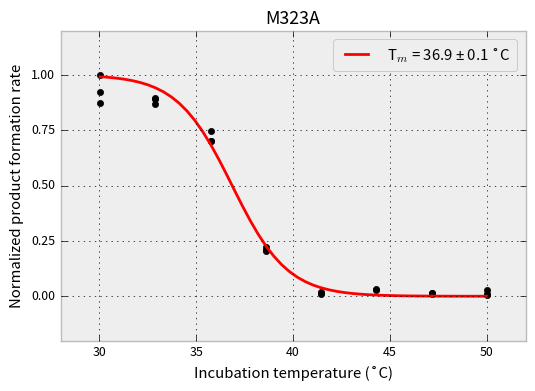

M323K


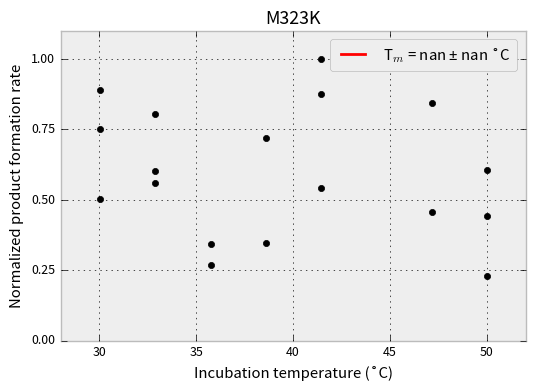

M361T


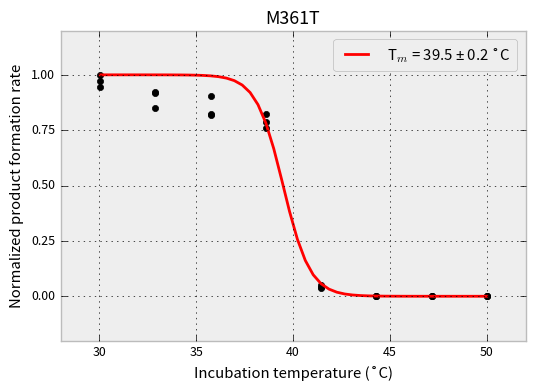

N163A


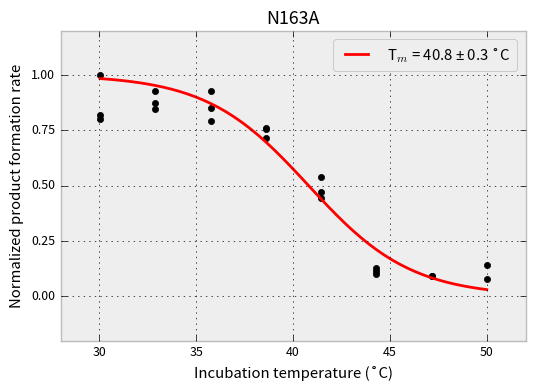

N163C


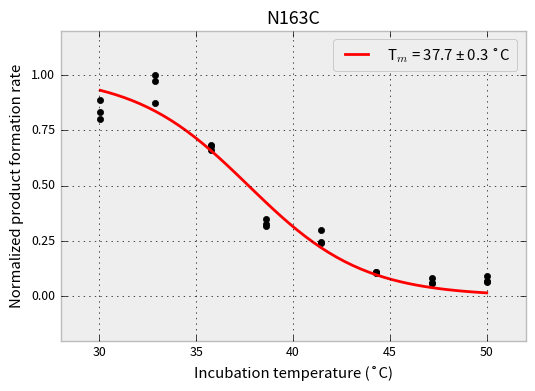

N163D


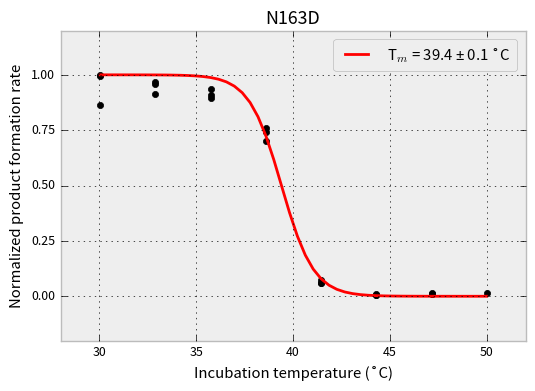

N166D


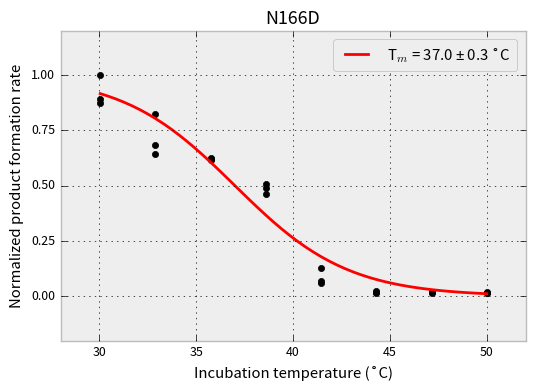

N220A


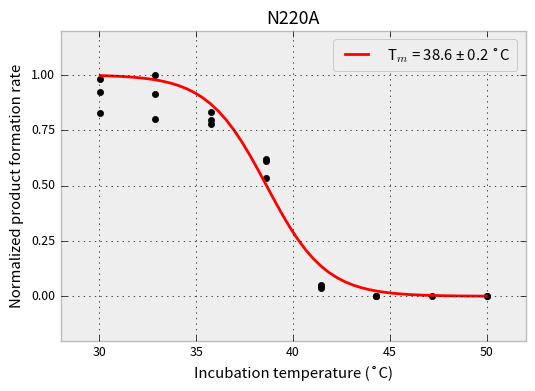

N220R


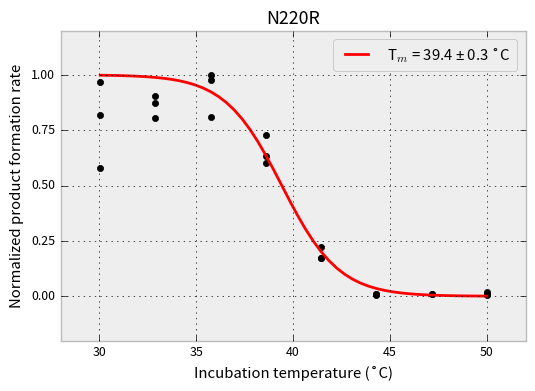

N220Y


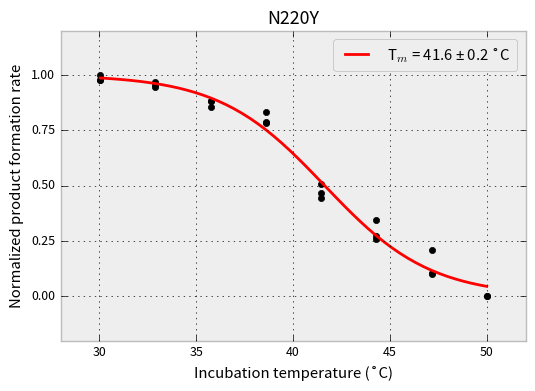

N223G


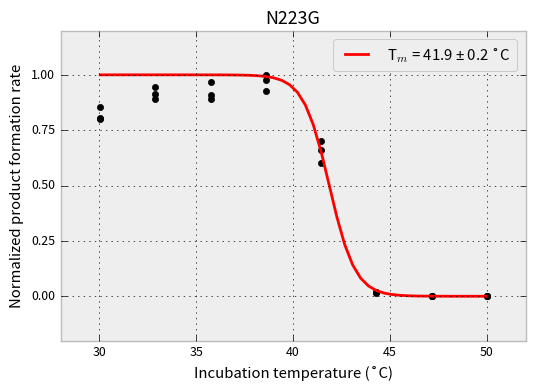

N223H


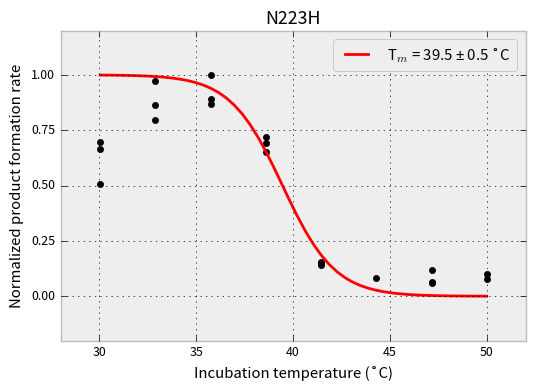

N293A


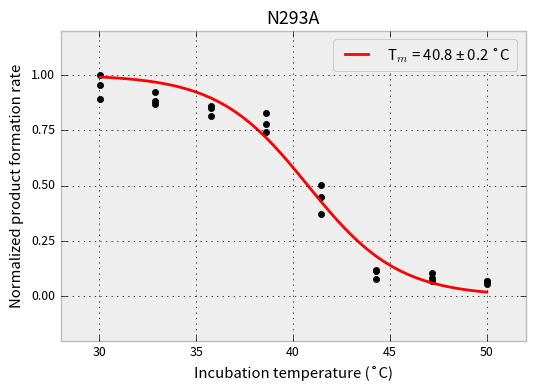

N293C


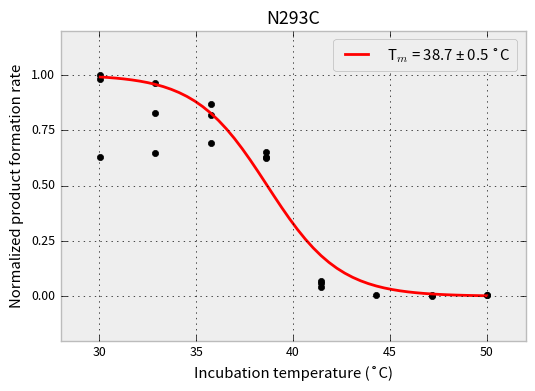

N293D


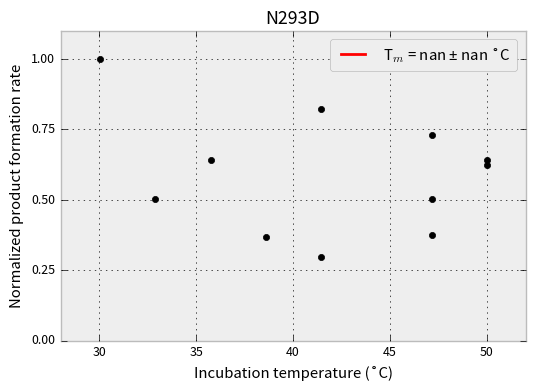

N293Q


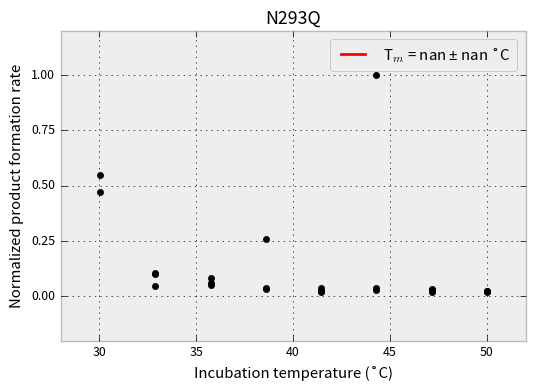

N354A


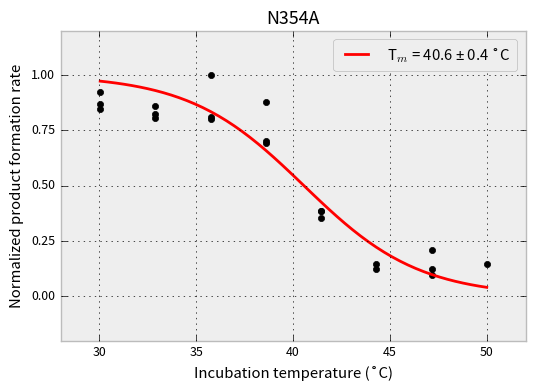

N404A


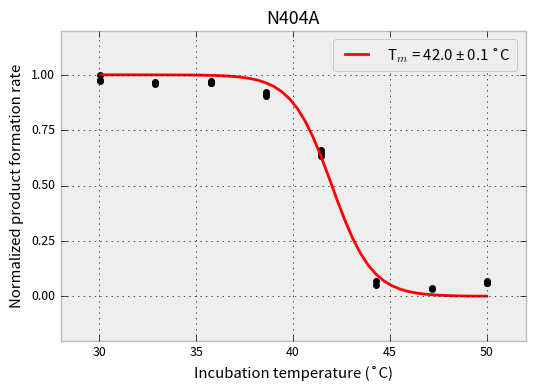

N407C


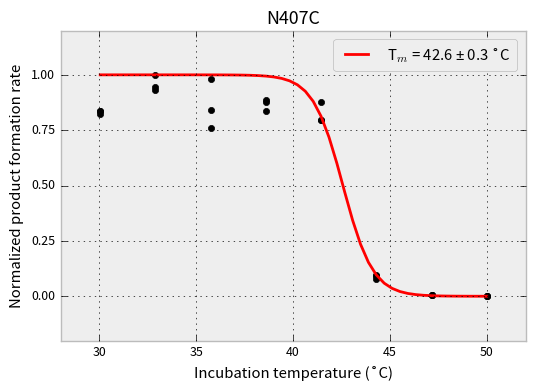

P329N


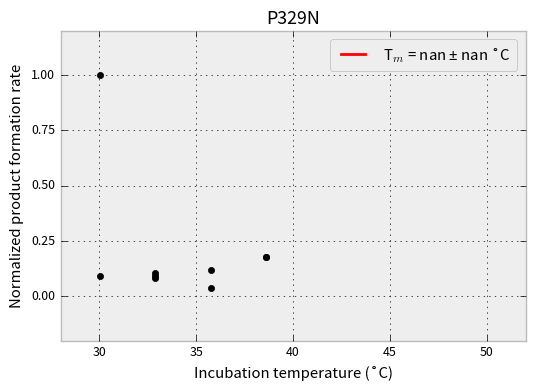

Q19A


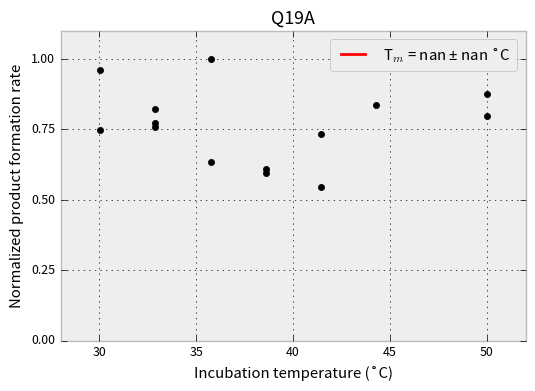

Q19C


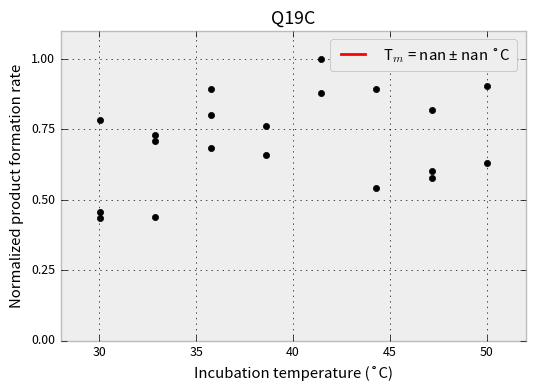

Q22S


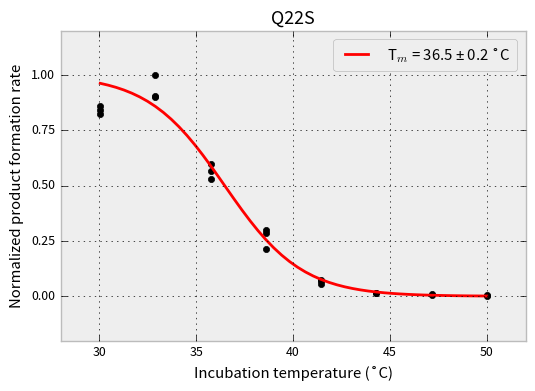

Q313R


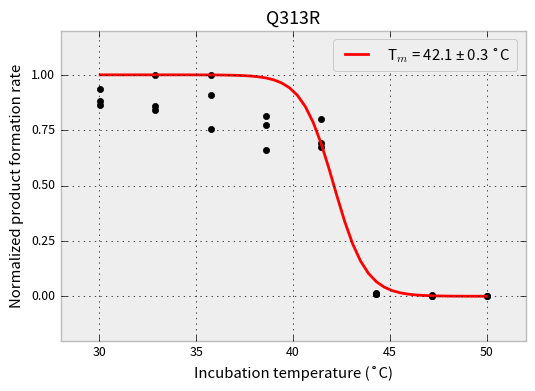

Q316R


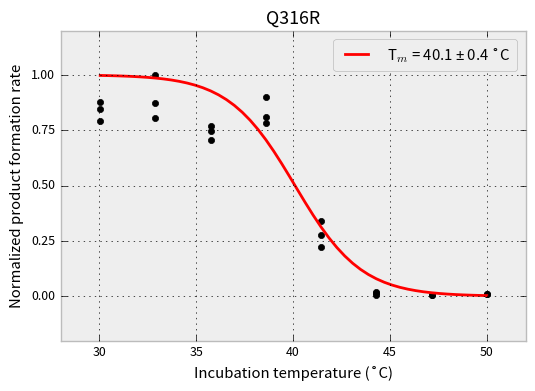

R240A


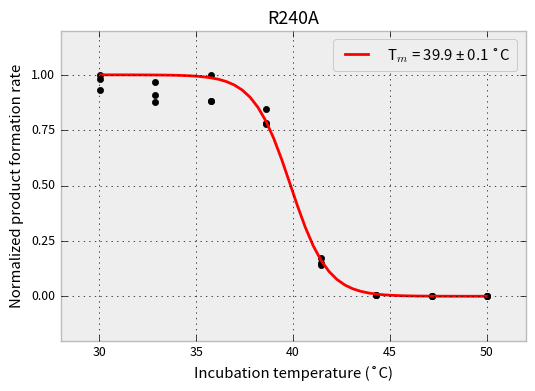

R240D


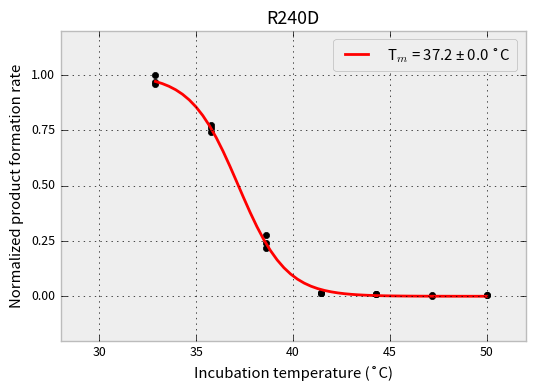

R240E


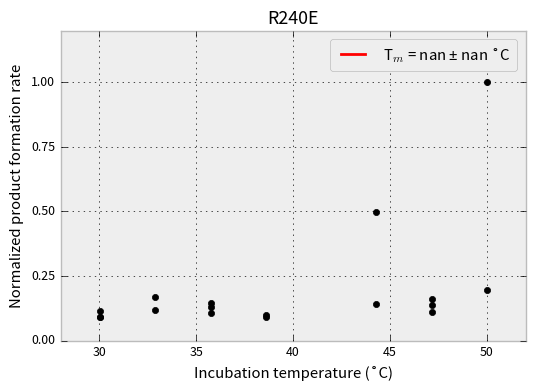

R240K


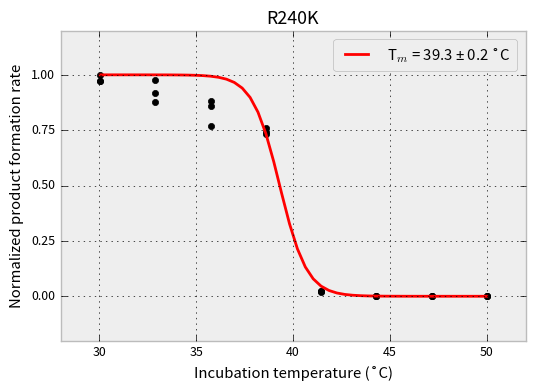

R76A


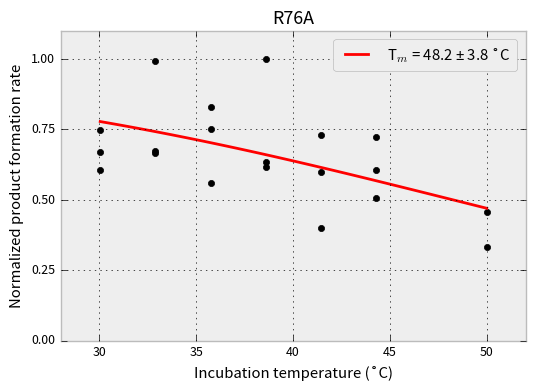

S14A


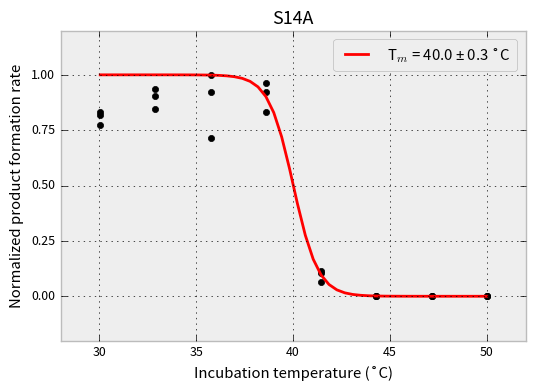

S16A


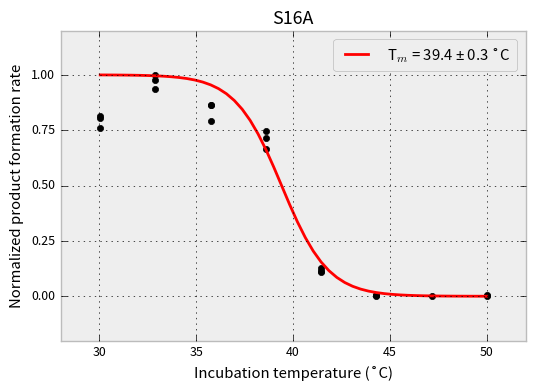

S16N


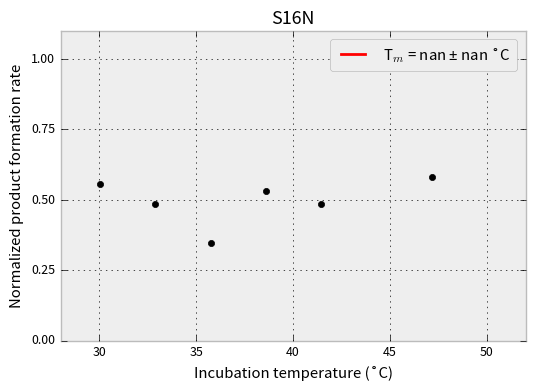

S17A


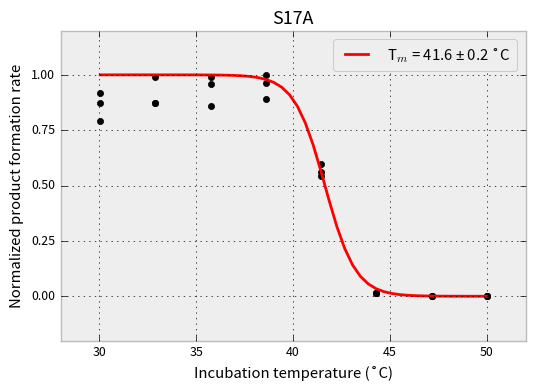

S17E


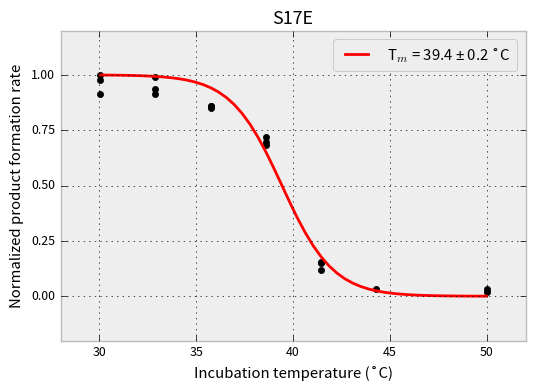

S19A


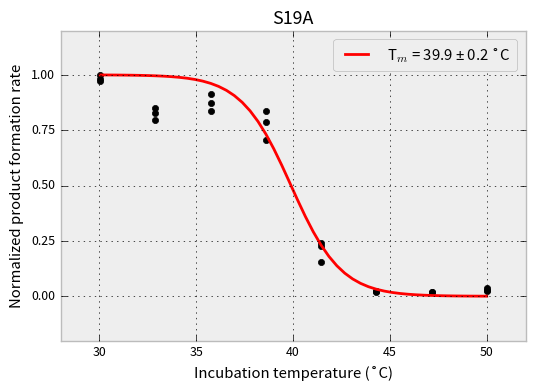

S298E


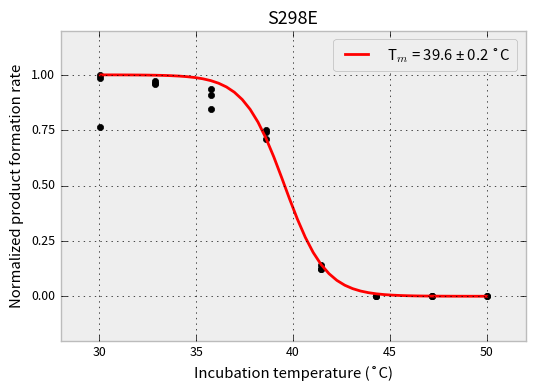

S334A


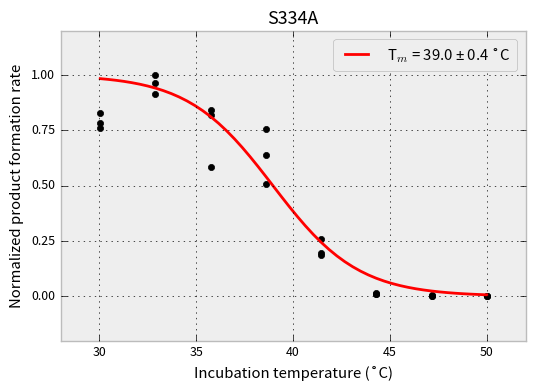

S400A


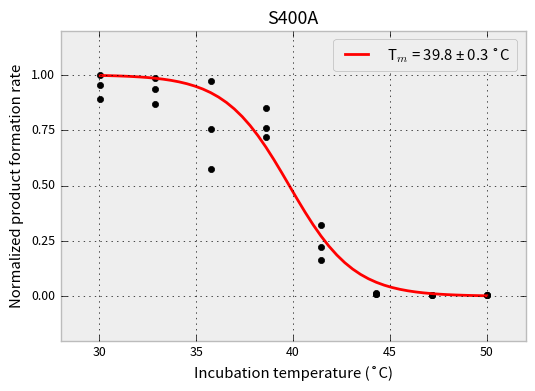

T15A


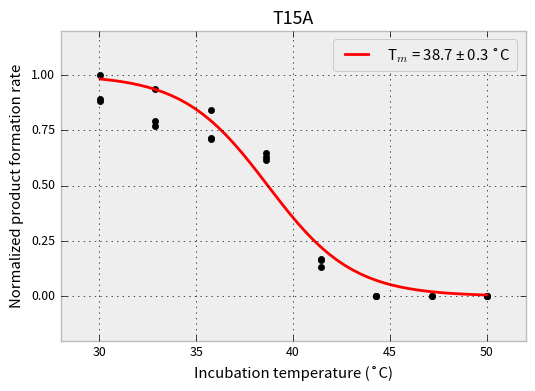

T178R


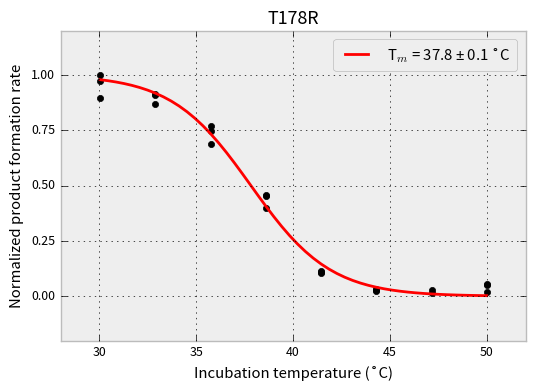

T218A


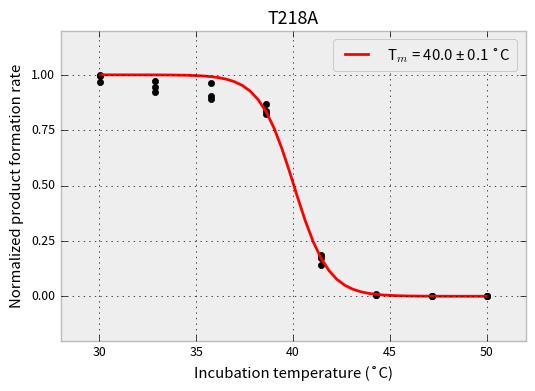

T296A


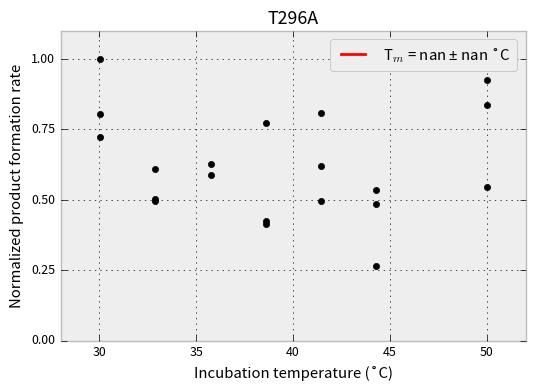

T352A


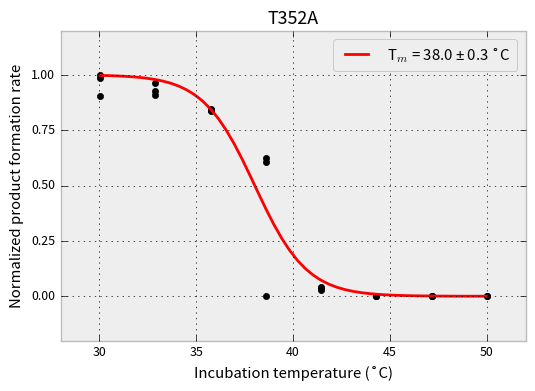

V55G


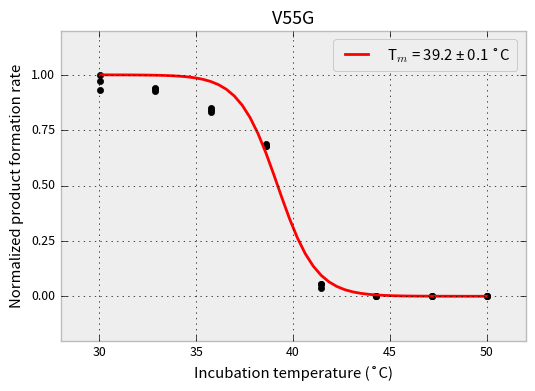

W120A


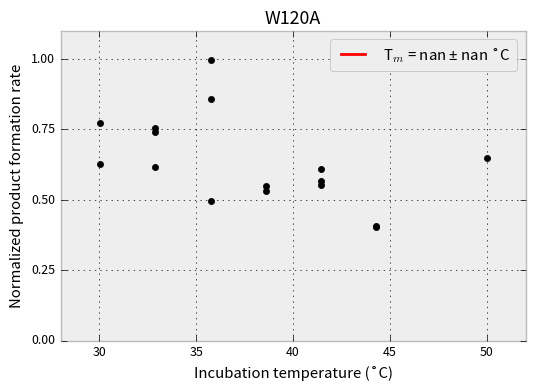

W120F


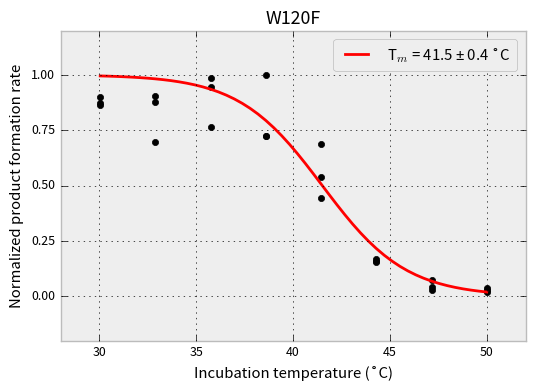

W120H


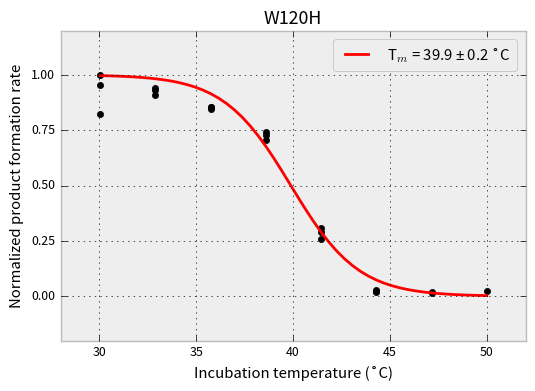

W325A


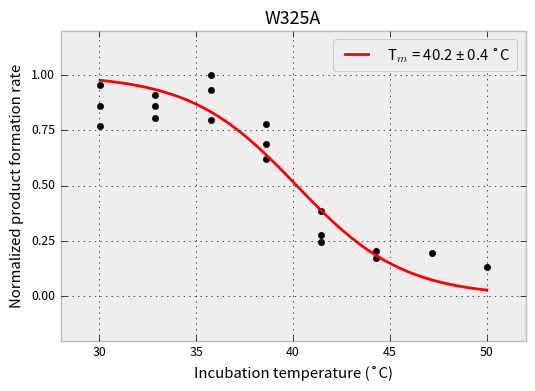

W325G


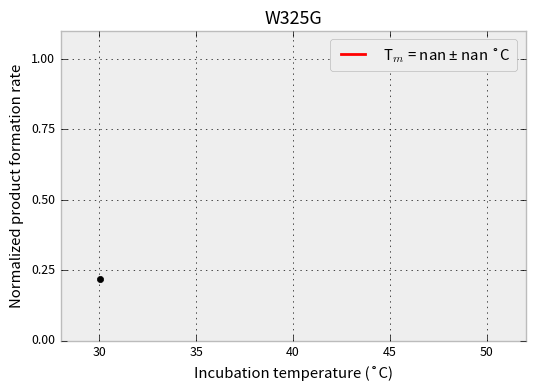

W325H


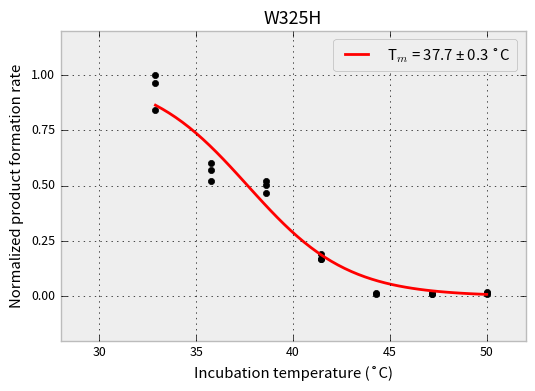

W325L


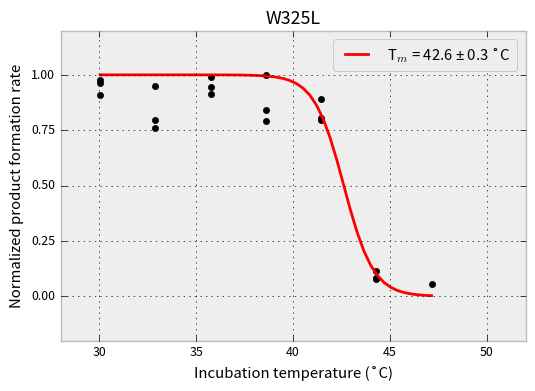

W325L_D


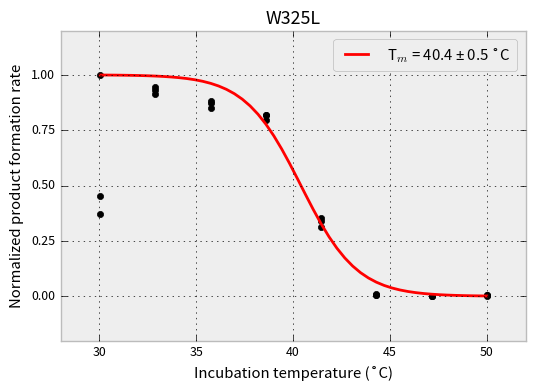

W325R


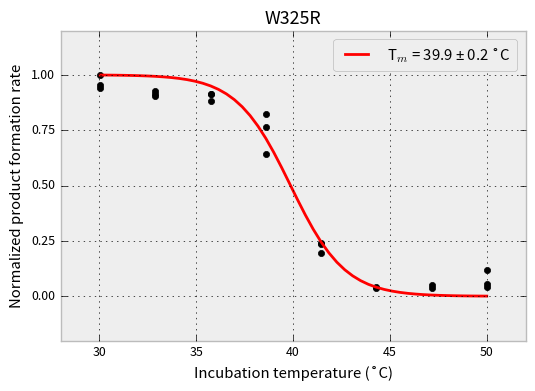

W328C


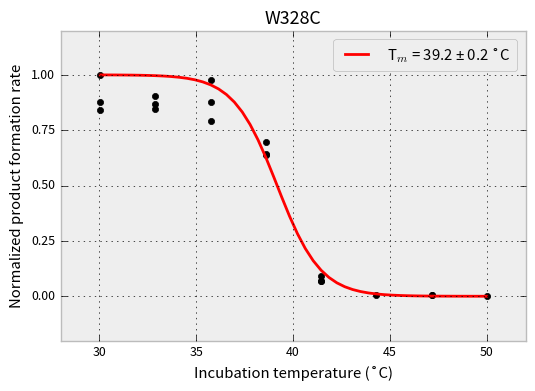

W328H


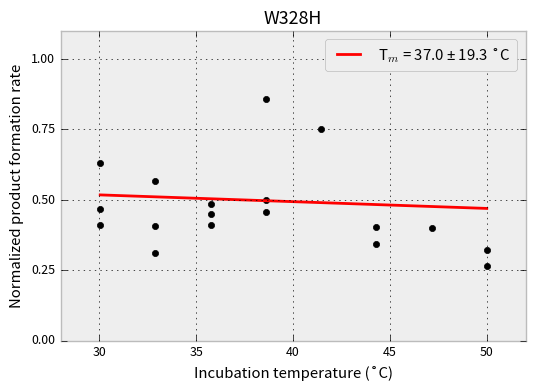

W328L


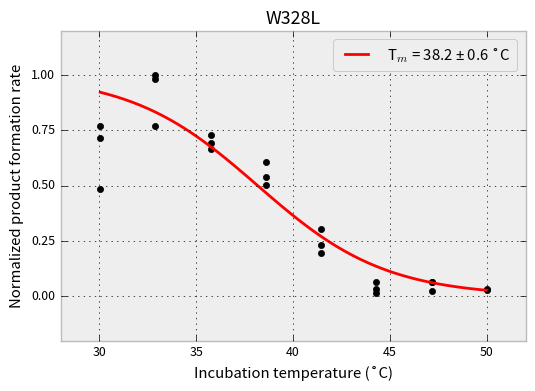

W34A


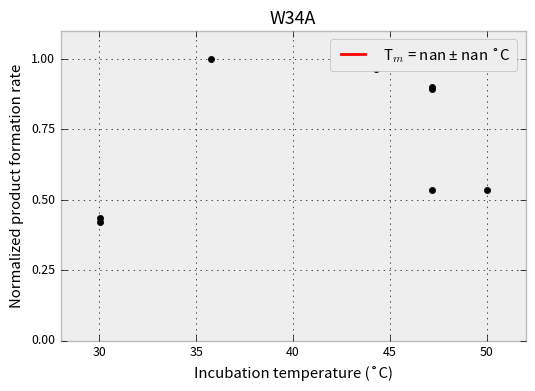

W399A


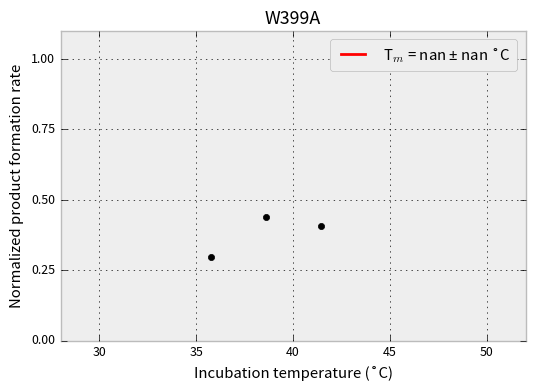

W399A_B


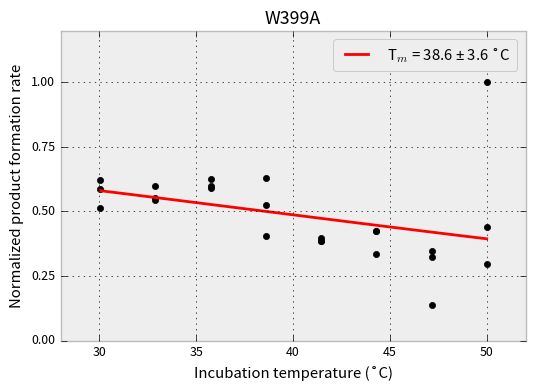

W399A_C


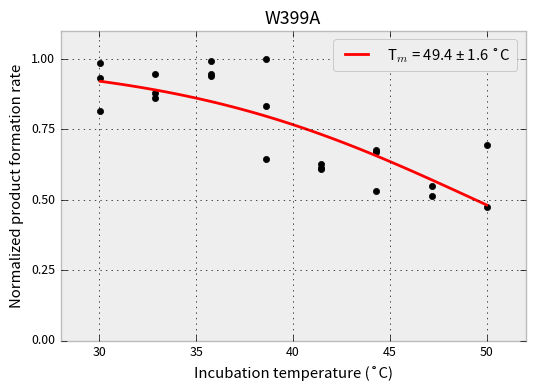

W399C


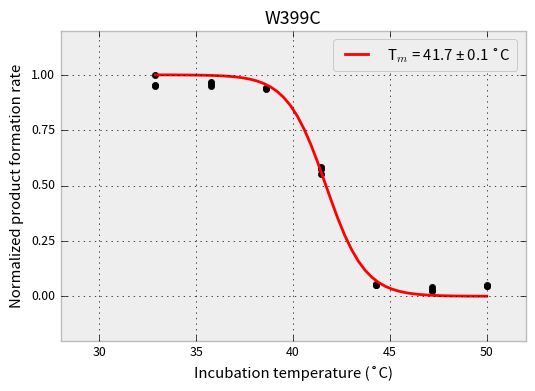

W399G


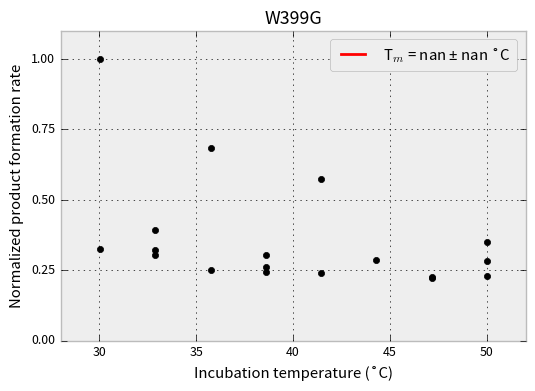

W399R


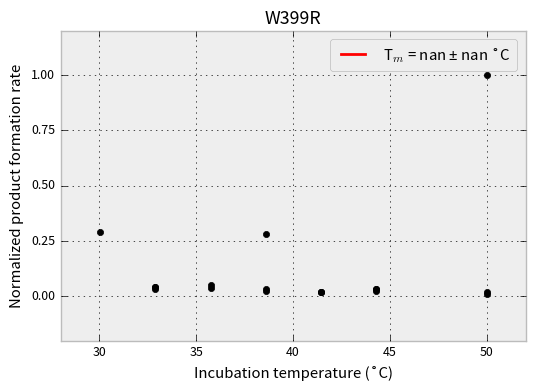

W399R_D


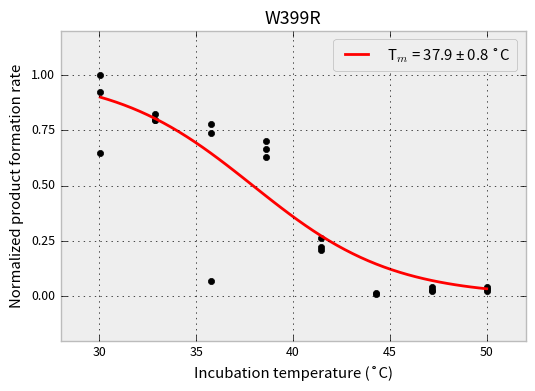

W399S


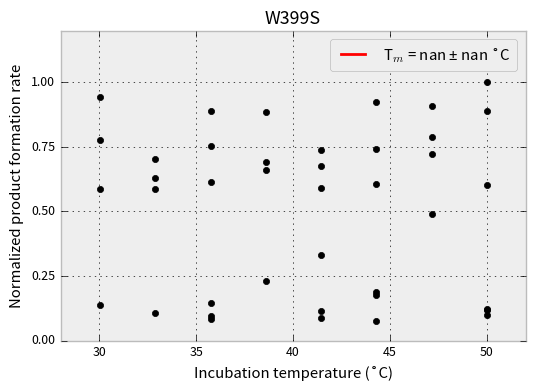

W402C


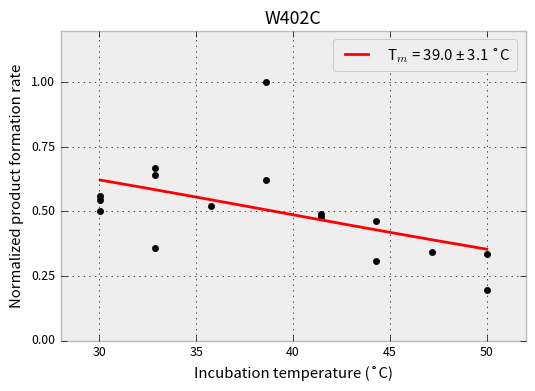

W407A


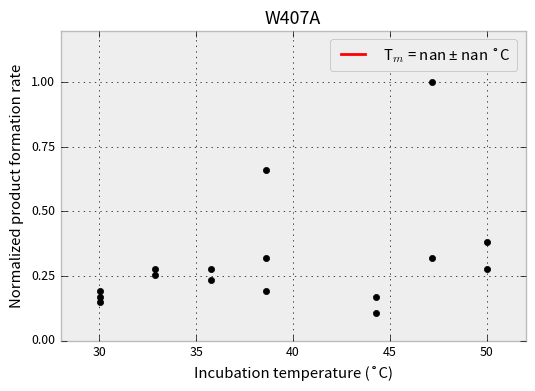

W407G


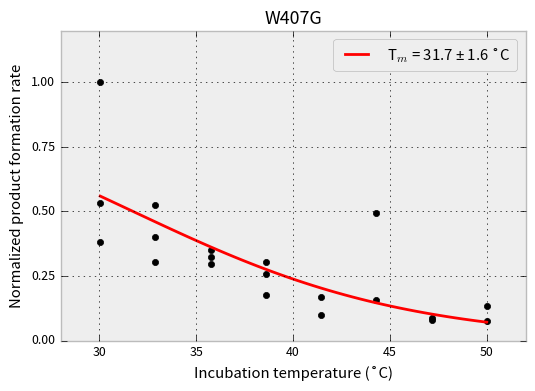

W407Q


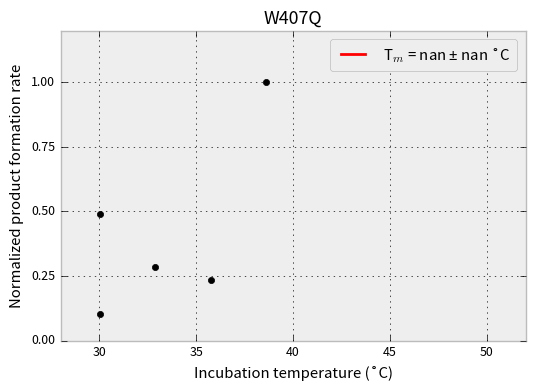

W407R


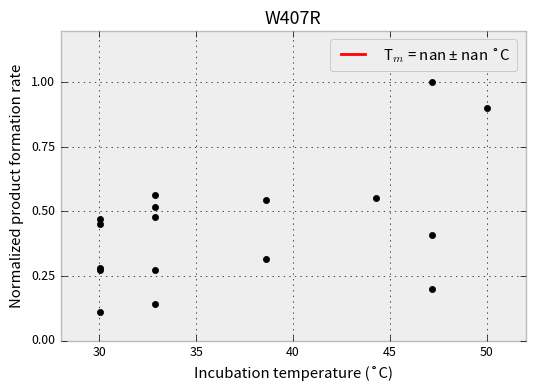

W409Y


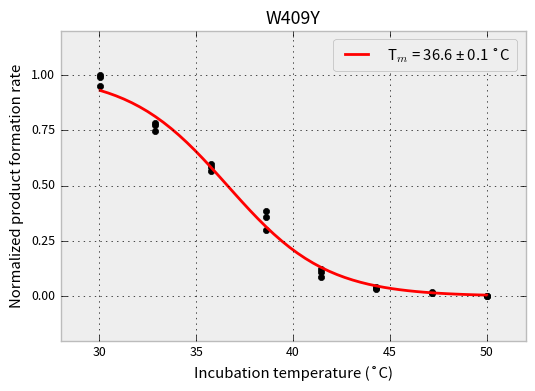

Y166P


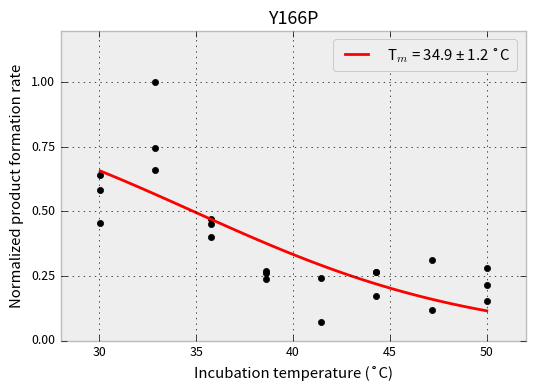

Y169P


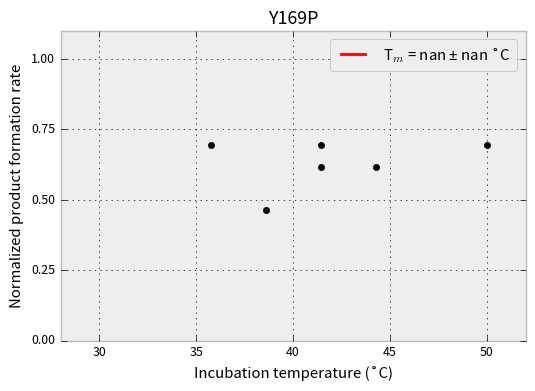

Y18A


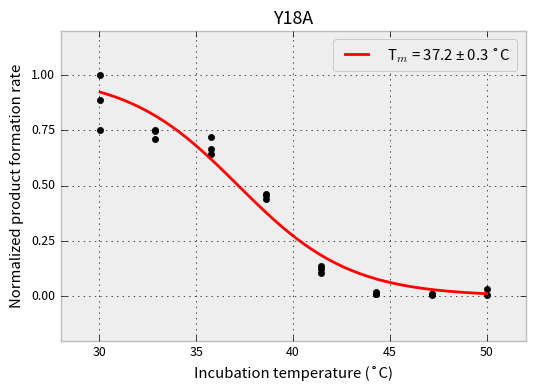

Y294A


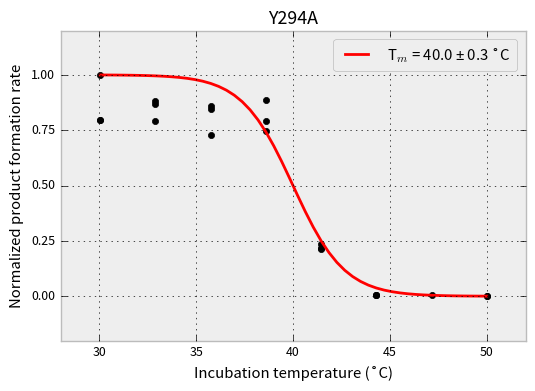

Y294F


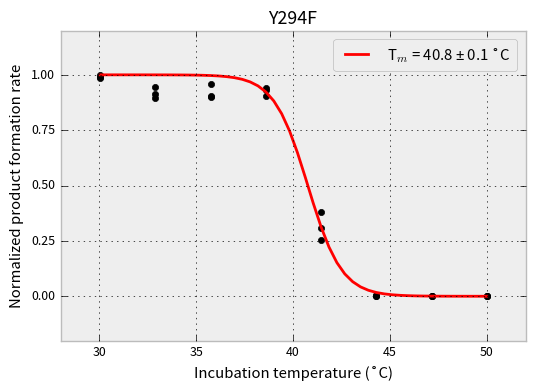

Y295A


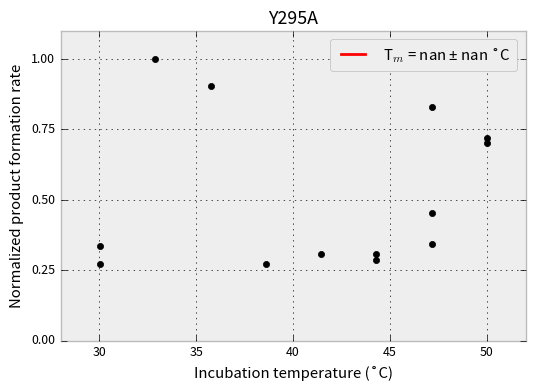

Y295G


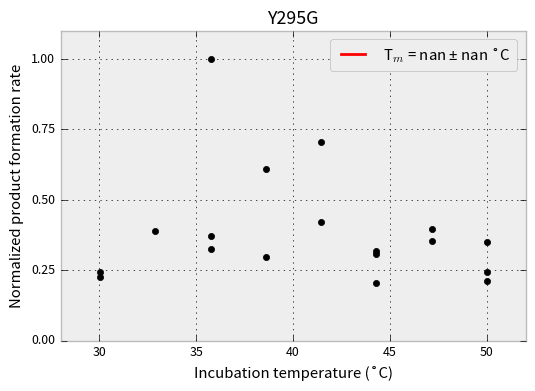

Y297F


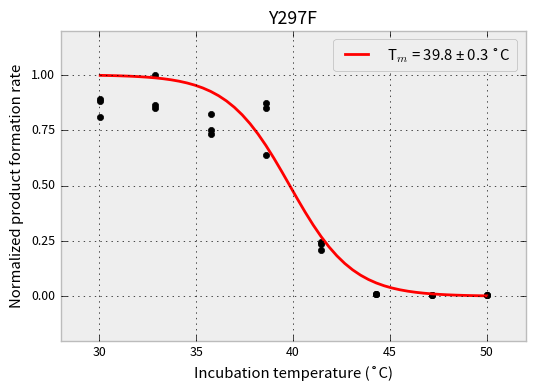

In [18]:
for idx, data in df.groupby( 'mutant' ):
    normalized_rates = data.rate / data.rate.max()
    plt.scatter( data.temp, normalized_rates, color='k' )
    x_vals = np.linspace( data.temp.min(), data.temp.max(), 50 )
    my_params = good_thermal_fits.loc[ idx ]
    plt.plot( x_vals, r( x_vals, my_params.tm, my_params.k ), color='red' )
    plt.legend( ['T$_m$ = {} ± {} ˚C'.format( my_params.tm.round(1), my_params.tm_std_err.round(1) )], loc=1 )
    plt.xlim( ( 28, 52 ) )
    plt.xticks( ( 30, 35, 40, 45, 50 ) ) 
    plt.xlabel( 'Incubation temperature (˚C)' )
    plt.yticks( ( 0, 0.25, .5, .75, 1 ) )
    plt.ylabel( 'Normalized product formation rate' ) 
    print( idx ) 
    #plt.title( idx ) 
    if '_' in idx:
        plt.title( idx.split( '_' )[0] )
    else:
        plt.title( idx )
    plt.show()